___

<p style="text-align: center;"><img src="https://clarusway.com/wp-content/uploads/2022/07/clarusway-logo-classic.jpg" class="img-fluid" alt="CLRSWY" width="400" height="300"
></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# Tasks

## Import Modules, Load Data and Data Review
## Data Pre-Processing
## Implement Linear Regression 
## Implement Ridge Regression
## Implement Lasso Regression 
## Implement Elastic-Net
## Visually Compare Models Performance In a Graph

# Import Modules, Load Data and Data Review

In [1]:
# conda install scikit-learn-intelex  
# python < 3.12

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

ModuleNotFoundError: No module named 'sklearnex'

In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split


from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [3]:
#!pip install -U scikit-learn

In [4]:
import sklearn
sklearn.__version__

'1.5.0'

In [5]:
df = pd.read_csv("Ready_to_ML.csv")

In [6]:
df.head()

make_model           make  \
0     Mercedes-Benz A 160  Mercedes-Benz   
1   Mercedes-Benz EQE 350  Mercedes-Benz   
2  Mercedes-Benz A 45 AMG  Mercedes-Benz   
3  Mercedes-Benz A 35 AMG  Mercedes-Benz   
4  Mercedes-Benz A 45 AMG  Mercedes-Benz   

                                            location    price body_type  \
0  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...  16950.0   Compact   
1       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES  80900.0   Compact   
2  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...  69900.0   Compact   
3  Carrer de Provença, 31 Local,  8029 BARCELONA, ES  46990.0   Compact   
4             CARRIL ARAGONES 4,  30007 CASILLAS, ES  16800.0   Compact   

             type warranty   mileage    gearbox fuel_type  seller  \
0            Used      Yes  120200.0     Manual    Diesel  Dealer   
1  Pre-registered      Yes    5000.0  Automatic  Electric  Dealer   
2            Used      Yes   18900.0  Automatic   Benzine  Dealer   
3            Used      Yes   18995.0  Automatic   Benzine  Dealer   
4            Used      Yes  197000.0  Automatic    Diesel  Dealer   

   engine_size  gears  co_emissions drivetrain  \
0       1595.0    5.0          98.0      Front   
1          1.0    1.0           0.0        4WD   
2       1991.0    8.0         162.0        4WD   
3       1991.0    7.0         169.0        4WD   
4       2143.0    7.0         162.0        4WD   

                                              extras  empty_weight  \
0                                       Alloy wheels        1270.0   
1  Alloy wheels (21"), Shift paddles, Sport packa...        2355.0   
2                                       Alloy wheels        1555.0   
3                                        Sport seats        1455.0   
4                                       Alloy wheels        1545.0   

  full_service_history         upholstery  previous_owner  \
0                   No              Cloth             2.0   
1                   No  Part/Full Leather             1.0   
2                   No  Part/Full Leather             2.0   
3                   No  Part/Full Leather             2.0   
4                   No  Part/Full Leather             2.0   

  energy_efficiency_class  age  power_kW  cons_avg  \
0               efficient  6.0      75.0     3.800   
1               efficient  0.0     215.0     2.359   
2             unefficient  2.0     310.0     8.400   
3             unefficient  2.0     225.0     7.300   
4             unefficient  7.0     100.0     4.900   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                      Standard   
1                       Premium                          Plus   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1       Safety Premium Package  
2  Safety Premium Plus Package  
3       Safety Premium Package  
4  Safety Premium Plus Package

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [8]:
df.describe()

price        mileage   engine_size         gears  co_emissions  \
count   26711.000000   26711.000000  26711.000000  26711.000000  26711.000000   
mean    23537.240538   68863.811928   1708.964696      5.820112    129.525841   
std     20811.986347   62794.146434    772.439713      1.416920     54.255203   
min       490.000000       0.000000      0.000000      1.000000      0.000000   
25%     12490.000000   19155.000000   1248.000000      5.000000    105.000000   
50%     18440.000000   54000.000000   1595.000000      6.000000    123.000000   
75%     28330.000000  100675.000000   1969.000000      6.000000    150.000000   
max    549000.000000  667128.000000   6300.000000      8.000000    399.000000   

       empty_weight  previous_owner           age      power_kW      cons_avg  
count  26711.000000    26711.000000  26711.000000  26711.000000  26711.000000  
mean    1425.205421        1.460073      5.166448    118.414380      5.531746  
std      307.386873        0.852665      4.654800     65.642485      2.220290  
min      347.000000        1.000000      0.000000     33.000000      0.000000  
25%     1228.000000        1.000000      2.000000     80.000000      4.300000  
50%     1375.000000        1.000000      4.000000    100.000000      5.200000  
75%     1597.000000        2.000000      7.000000    135.000000      6.400000  
max     3150.000000        9.000000     20.000000    450.000000     18.300000

## Drop Duplicated Samples

In [9]:
df.duplicated().sum()

1815

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

## Drop make_models with less than 100 counts

In [12]:
make_model_count=df.make_model.value_counts()
make_model_count

# In order for ML models to learn a data well, the data should contain all the details as possible.
# When we look at the number of brand models, we see that the number of models of some brands is very low.
# In order for ML models to accurately predict car prices on a brand-by-model basis,
# there must be enough observations from each brand and model. For this, we exclude brand models under 100 from our data.

make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

In [13]:
drop_model = make_model_count[make_model_count <= 100].index
drop_model

# We list the models with 100 or less observations.
# We will drop the observations of the models in this list from our data.

Index(['Hyundai i10', 'Peugeot 307', 'Fiat 124 Spider', 'Renault Twingo',
       'Fiat 500L', 'Opel Crossland X', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz A 200', 'Skoda Kamiq',
       ...
       'Mercedes-Benz ML 300', 'Dacia Break', 'Toyota Tundra',
       'Mercedes-Benz E 50 AMG', 'Mercedes-Benz CLS 300',
       'Mercedes-Benz S 65 AMG', 'Mercedes-Benz CLK 320', 'Toyota GR86',
       'Toyota Tacoma', 'Renault R 11'],
      dtype='object', name='make_model', length=420)

In [14]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)
    
# We pull all the models in the model list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [15]:
df

make_model           make  \
0      Mercedes-Benz A 180  Mercedes-Benz   
1      Mercedes-Benz A 180  Mercedes-Benz   
2      Mercedes-Benz A 180  Mercedes-Benz   
3      Mercedes-Benz A 180  Mercedes-Benz   
4      Mercedes-Benz A 180  Mercedes-Benz   
...                    ...            ...   
18192            Volvo V40          Volvo   
18193            Volvo S60          Volvo   
18194            Volvo S90          Volvo   
18195            Volvo C30          Volvo   
18196            Volvo S90          Volvo   

                                                location    price body_type  \
0      Bestel gemakkelijk Online 24/7,  1000 Brussel, BE  24400.0   Compact   
1                     Zaackoer Weg 34,  15926 Luckau, DE   7450.0   Compact   
2                     Calle Carbón 19,  29603 MALAGA, ES  29800.0   Compact   
3                    RUA REAL 60,  36860 PONTEAEREAS, ES  21000.0   Compact   
4      Canal de Sant Jordi nº17 Pol. Ind. Son oms,  0...  26800.0   Compact   
...                                                  ...      ...       ...   
18192                                   1000 Brussel, BE  13000.0     Sedan   
18193             CALLE CATALUNYA, 37,  8520 LLERONA, ES   4999.0     Sedan   
18194           HERMANOS LUMIERE Nº16,  29004 MALAGA, ES  37600.0     Sedan   
18195             Sur rendez-vous,  5060 Sambreville, BE   7300.0     Sedan   
18196    Bergambachterstraat 5,  2871 JB SCHOONHOVEN, NL  29900.0     Sedan   

       type warranty   mileage    gearbox fuel_type          seller  \
0      Used      Yes   27150.0     Manual    Diesel          Dealer   
1      Used       No  157500.0     Manual    Diesel          Dealer   
2      Used      Yes   21734.0  Automatic    Diesel          Dealer   
3      Used      Yes  172700.0  Automatic    Diesel          Dealer   
4      Used      Yes   18989.0  Automatic    Diesel          Dealer   
...     ...      ...       ...        ...       ...             ...   
18192  Used       No  114000.0     Manual    Diesel  Private seller   
18193  Used      Yes  166512.0     Manual   Benzine          Dealer   
18194  Used      Yes   40345.0  Automatic    Diesel          Dealer   
18195  Used      Yes   96000.0     Manual    Diesel          Dealer   
18196  Used      Yes   94343.0  Automatic   Benzine          Dealer   

       engine_size  gears  co_emissions drivetrain  \
0           1461.0    6.0         120.0      Front   
1           1991.0    6.0         138.0      Front   
2           1461.0    7.0          99.5      Front   
3           1461.0    7.0          99.5      Front   
4           1461.0    7.0          99.5      Front   
...            ...    ...           ...        ...   
18192       1969.0    6.0          94.0      Front   
18193       2521.0    5.0         145.0      Front   
18194       1969.0    8.0         127.0        4WD   
18195       1560.0    6.0          99.0      Front   
18196       1969.0    8.0         149.0        4WD   

                                                  extras  empty_weight  \
0      Alloy wheels, Automatically dimming interior m...        1330.0   
1      Alloy wheels, Automatically dimming interior m...        1295.0   
2                                            Sport seats        1445.0   
3                                            Sport seats        1425.0   
4                                            Sport seats        1455.0   
...                                                  ...           ...   
18192  All season tyres, Ambient lighting, Cargo barr...        1532.0   
18193                                       Alloy wheels        1550.0   
18194                                       Alloy wheels        2077.0   
18195  Alloy wheels, Automatically dimming interior m...        1356.0   
18196  Alloy wheels (18"), Automatically dimming inte...        1617.0   

      full_service_history         upholstery  previous_owner  \
0                       No  Part/Full Leather             2.0   
1    

In [16]:
df.make_model.value_counts()

# We saw that models with less than 100 observations were dropped.

make_model
Renault Megane         825
SEAT Leon              757
Dacia Sandero          721
Hyundai i30            699
Opel Astra             634
Ford Mustang           572
Peugeot 308            536
Nissan Qashqai         484
Ford Focus             483
SEAT Ibiza             433
Volvo V40              430
Fiat Tipo              415
Fiat 500               413
Renault Clio           404
Ford Fiesta            392
Nissan Micra           380
Fiat 500X              373
Skoda Octavia          359
Opel Corsa             358
Dacia Duster           343
Toyota Yaris           323
Opel Insignia          290
Volvo C70              281
Peugeot 208            260
Skoda Fabia            246
Fiat 500C              238
Toyota Auris           231
Peugeot RCZ            220
Hyundai TUCSON         216
Peugeot 3008           215
Ford Kuga              208
Dacia Logan            197
Peugeot 508            194
Volvo XC60             192
Toyota Corolla         190
Skoda Superb           189
Skoda Scala      

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     18197 non-null  object 
 1   make                           18197 non-null  object 
 2   location                       18197 non-null  object 
 3   price                          18197 non-null  float64
 4   body_type                      18197 non-null  object 
 5   type                           18197 non-null  object 
 6   warranty                       18197 non-null  object 
 7   mileage                        18197 non-null  float64
 8   gearbox                        18197 non-null  object 
 9   fuel_type                      18197 non-null  object 
 10  seller                         18197 non-null  object 
 11  engine_size                    18197 non-null  float64
 12  gears                          18197 non-null 

## Feature Engineering

In [18]:
df.head(2)

make_model           make  \
0  Mercedes-Benz A 180  Mercedes-Benz   
1  Mercedes-Benz A 180  Mercedes-Benz   

                                            location    price body_type  type  \
0  Bestel gemakkelijk Online 24/7,  1000 Brussel, BE  24400.0   Compact  Used   
1                 Zaackoer Weg 34,  15926 Luckau, DE   7450.0   Compact  Used   

  warranty   mileage gearbox fuel_type  seller  engine_size  gears  \
0      Yes   27150.0  Manual    Diesel  Dealer       1461.0    6.0   
1       No  157500.0  Manual    Diesel  Dealer       1991.0    6.0   

   co_emissions drivetrain                                             extras  \
0         120.0      Front  Alloy wheels, Automatically dimming interior m...   
1         138.0      Front  Alloy wheels, Automatically dimming interior m...   

   empty_weight full_service_history         upholstery  previous_owner  \
0        1330.0                   No  Part/Full Leather             2.0   
1        1295.0                  Yes              Cloth             2.0   

  energy_efficiency_class   age  power_kW  cons_avg  \
0             unefficient   2.0      85.0       4.5   
1             unefficient  12.0      80.0       5.2   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package

In [19]:
df.drop(columns=["make", "location"], inplace=True)

# make_model feature already gives us insight about make feature so we drop make feature.
# We are dropping the location feature because we don't think it will have an effect on prices.

In [20]:
df.head(2)

make_model    price body_type  type warranty   mileage gearbox  \
0  Mercedes-Benz A 180  24400.0   Compact  Used      Yes   27150.0  Manual   
1  Mercedes-Benz A 180   7450.0   Compact  Used       No  157500.0  Manual   

  fuel_type  seller  engine_size  gears  co_emissions drivetrain  \
0    Diesel  Dealer       1461.0    6.0         120.0      Front   
1    Diesel  Dealer       1991.0    6.0         138.0      Front   

                                              extras  empty_weight  \
0  Alloy wheels, Automatically dimming interior m...        1330.0   
1  Alloy wheels, Automatically dimming interior m...        1295.0   

  full_service_history         upholstery  previous_owner  \
0                   No  Part/Full Leather             2.0   
1                  Yes              Cloth             2.0   

  energy_efficiency_class   age  power_kW  cons_avg  \
0             unefficient   2.0      85.0       4.5   
1             unefficient  12.0      80.0       5.2   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package

In [21]:
df_object = df.select_dtypes(include ="object").head()
df_object

# # select_dtypes(include ="object") method to filter only object type features 

make_model body_type  type warranty    gearbox fuel_type  seller  \
0  Mercedes-Benz A 180   Compact  Used      Yes     Manual    Diesel  Dealer   
1  Mercedes-Benz A 180   Compact  Used       No     Manual    Diesel  Dealer   
2  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   
3  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   
4  Mercedes-Benz A 180   Compact  Used      Yes  Automatic    Diesel  Dealer   

  drivetrain                                             extras  \
0      Front  Alloy wheels, Automatically dimming interior m...   
1      Front  Alloy wheels, Automatically dimming interior m...   
2      Front                                        Sport seats   
3      Front                                        Sport seats   
4      Front                                        Sport seats   

  full_service_history         upholstery energy_efficiency_class  \
0                   No  Part/Full Leather             unefficient   
1                  Yes              Cloth             unefficient   
2                   No              Cloth             unefficient   
3                   No              Cloth             unefficient   
4                   No              Cloth             unefficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package  
2       Safety Premium Package  
3      Safety Standard Package  
4       Safety Premium Package

In [22]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

# With <30, a 30-character space is left from the leftmost to the ":" sign and feature names are printed in this space.
# The ":" sign is aligned on all lines.

make_model                    : 70
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6478
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


### Converting the Extras feature from object to numeric

In [23]:
df.extras.head(10)

# Since we want our ML Model to give more weight to cars with more features,
# we will count the features here and assign the numbers we find
# to the places of the categorical observations here.

0    Alloy wheels, Automatically dimming interior m...
1    Alloy wheels, Automatically dimming interior m...
2                                          Sport seats
3                                          Sport seats
4                                          Sport seats
5                                          Sport seats
6                                          Sport seats
7                    Alloy wheels (19"), Sport package
8                                         Alloy wheels
9                                          Sport seats
Name: extras, dtype: object

In [24]:
df.extras.iloc[0]

'Alloy wheels, Automatically dimming interior mirror, Spoiler, Sport seats, Voice Control'

In [25]:
df.extras.iloc[0].split(",")

['Alloy wheels',
 ' Automatically dimming interior mirror',
 ' Spoiler',
 ' Sport seats',
 ' Voice Control']

In [26]:
len(df.extras.iloc[0].split(","))

5

In [27]:
df.extras.apply(lambda x: len(x.split(',')))

# We counted the number of features in each row. We used the split and len functions to do this.

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [28]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

# We assign these numbers we find to the relevant feature.

In [29]:
df.head() # check extras feature turned into numeric

make_model    price body_type  type warranty   mileage    gearbox  \
0  Mercedes-Benz A 180  24400.0   Compact  Used      Yes   27150.0     Manual   
1  Mercedes-Benz A 180   7450.0   Compact  Used       No  157500.0     Manual   
2  Mercedes-Benz A 180  29800.0   Compact  Used      Yes   21734.0  Automatic   
3  Mercedes-Benz A 180  21000.0   Compact  Used      Yes  172700.0  Automatic   
4  Mercedes-Benz A 180  26800.0   Compact  Used      Yes   18989.0  Automatic   

  fuel_type  seller  engine_size  gears  co_emissions drivetrain  extras  \
0    Diesel  Dealer       1461.0    6.0         120.0      Front       5   
1    Diesel  Dealer       1991.0    6.0         138.0      Front       6   
2    Diesel  Dealer       1461.0    7.0          99.5      Front       1   
3    Diesel  Dealer       1461.0    7.0          99.5      Front       1   
4    Diesel  Dealer       1461.0    7.0          99.5      Front       1   

   empty_weight full_service_history         upholstery  previous_owner  \
0        1330.0                   No  Part/Full Leather             2.0   
1        1295.0                  Yes              Cloth             2.0   
2        1445.0                   No              Cloth             2.0   
3        1425.0                   No              Cloth             3.0   
4        1455.0                   No              Cloth             2.0   

  energy_efficiency_class   age  power_kW  cons_avg  \
0             unefficient   2.0      85.0       4.5   
1             unefficient  12.0      80.0       5.2   
2             unefficient   2.0      85.0       3.9   
3             unefficient   4.0      80.0       3.7   
4             unefficient   2.0      85.0       3.9   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   
1                       Premium                      Standard   
2                      Standard                      Standard   
3                      Standard                      Standard   
4                      Standard                      Standard   

     safety_&_security_Package  
0       Safety Premium Package  
1  Safety Premium Plus Package  
2       Safety Premium Package  
3      Safety Standard Package  
4       Safety Premium Package

In [30]:
df.extras.nunique()  # 6478 unique value --> reduced to 21 unique.

21

In [31]:
df.extras.unique()

array([ 5,  6,  1,  2,  8,  7,  3,  4, 12,  9, 11, 10, 15, 13, 14, 16, 18,
       17, 19, 26, 20], dtype=int64)

## Categorical features to be converted

In [32]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())
    
# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1.
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a featurea have a hierarchical advantage over
# each other (good, bad, very bad or cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority,
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

# To briefly summarize, if a feature has a meaningful relationship with the target, the ordinal encoder is applied.

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Toyota RAV 4' 'Nissan Micra'
 'Nissan Qashqai' 'Nissan Juke' 'Nissan Pulsar' 'Nissan 370Z'
 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo'
 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai IONIQ'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 

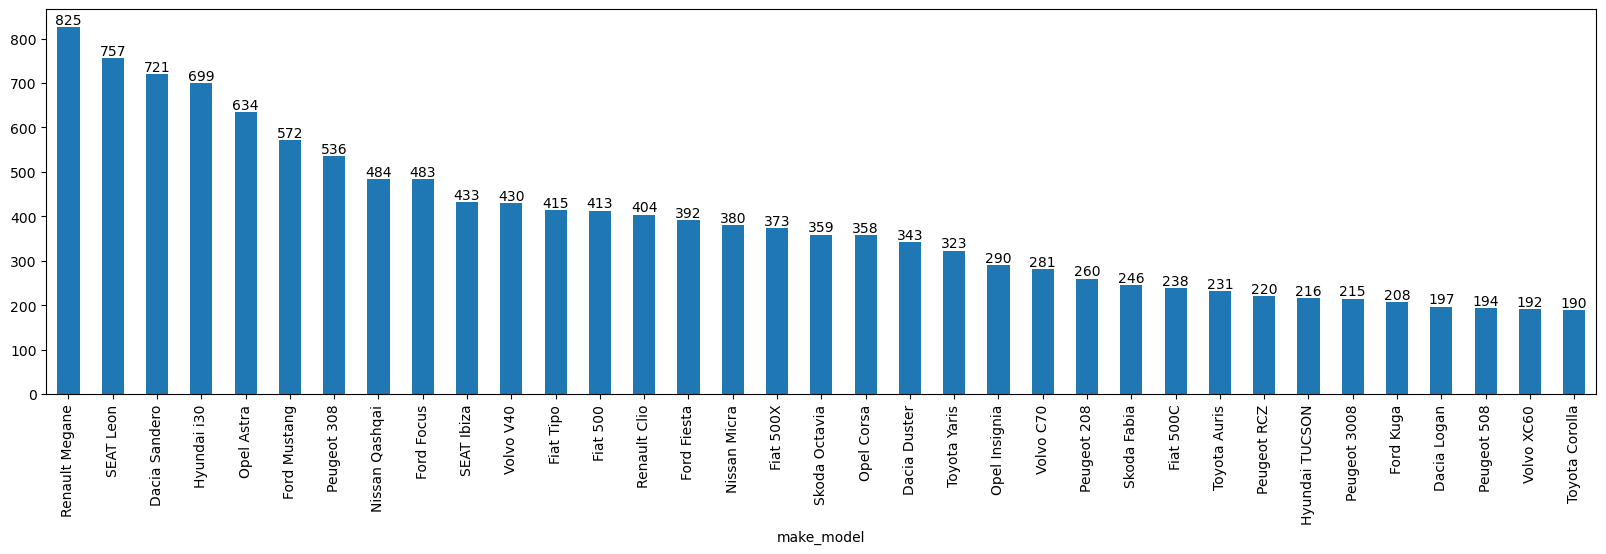

In [33]:
ax = df.make_model.value_counts().iloc[:35].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see the top 35 models with the most observations in our data and their numbers.

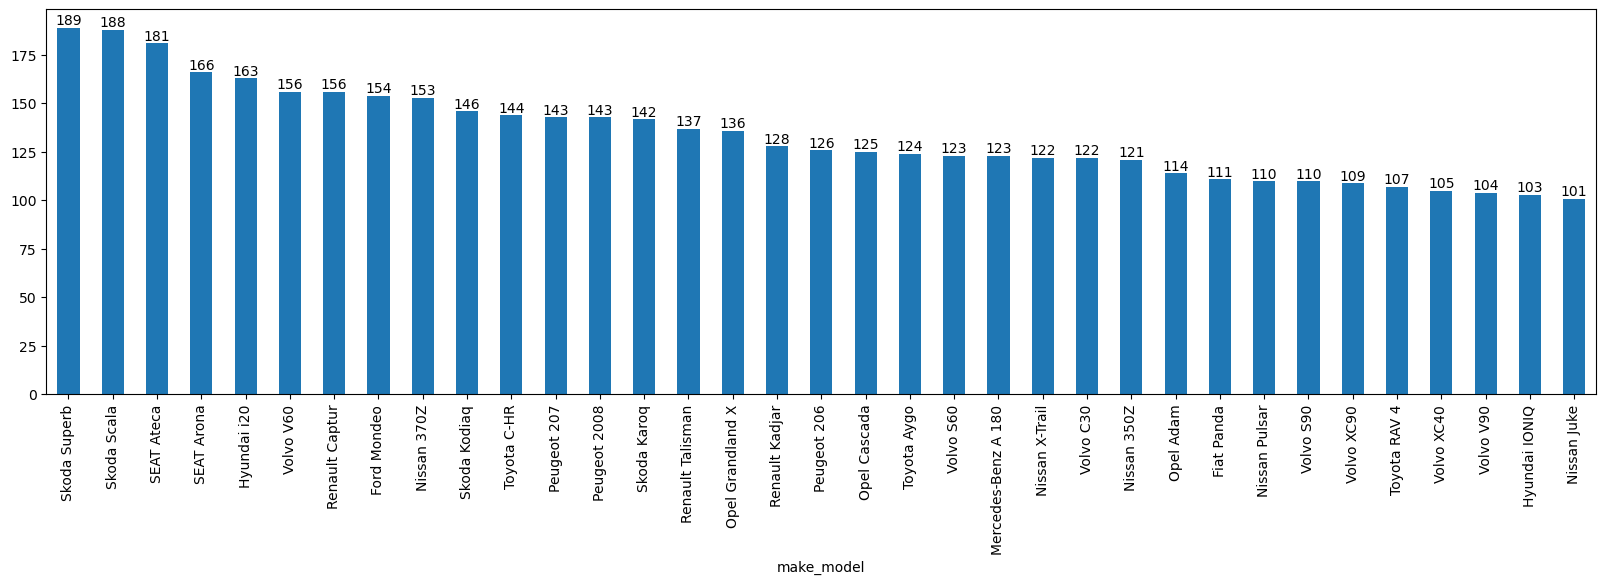

In [34]:
ax = df.make_model.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

# we see 35 models and numbers with the least observations in our data.

In [35]:
df2 = df.copy()

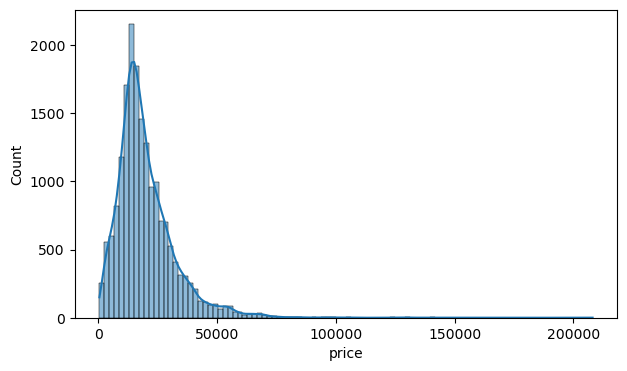

In [36]:
sns.histplot(df.price, bins=100, kde=True);

# Since linear models are very sensitive to outliers, I am trying to detect outliers in the data with histplot.
# Let's not forget that outlier for ML means that the data of a group or groups in our data is insufficient for training.
# By looking at the image below, we see that the number of vehicles over 70.000 EURO is very low.
# Based on this image, we can evaluate that the number of vehicles over 70.000 EURO may be insufficient for training.
# However, we cannot understand whether it is inadequate or not without training.
# We should decide by both dropping the observations that we consider as outliers and
# comparing the scores by doing the training without dropping them.

# Also, looking at the histplot for all the data may mislead us about the outlier.
# For outlier detection, we should group the data in our data (Opel Astra, Ford Fiesta, Volvo S60 etc.)
# and determine the outlier accordingly.

In [37]:
skew(df.price)

# We can say that the values between -0.5 and 0.5 perfectly fit the normal distribution, 
# the values between -1 and +1 fit the normal distribution well, 
# and the values smaller than -1 and greater than +1 now distort the normal distribution.

2.473903804317343

## multicollinearity control

In [38]:
df_numeric=df.select_dtypes(include ="number")
df_numeric

price   mileage  engine_size  gears  co_emissions  extras  \
0      24400.0   27150.0       1461.0    6.0         120.0       5   
1       7450.0  157500.0       1991.0    6.0         138.0       6   
2      29800.0   21734.0       1461.0    7.0          99.5       1   
3      21000.0  172700.0       1461.0    7.0          99.5       1   
4      26800.0   18989.0       1461.0    7.0          99.5       1   
...        ...       ...          ...    ...           ...     ...   
18192  13000.0  114000.0       1969.0    6.0          94.0       9   
18193   4999.0  166512.0       2521.0    5.0         145.0       1   
18194  37600.0   40345.0       1969.0    8.0         127.0       1   
18195   7300.0   96000.0       1560.0    6.0          99.0       3   
18196  29900.0   94343.0       1969.0    8.0         149.0       2   

       empty_weight  previous_owner   age  power_kW  cons_avg  
0            1330.0             2.0   2.0      85.0       4.5  
1            1295.0             2.0  12.0      80.0       5.2  
2            1445.0             2.0   2.0      85.0       3.9  
3            1425.0             3.0   4.0      80.0       3.7  
4            1455.0             2.0   2.0      85.0       3.9  
...             ...             ...   ...       ...       ...  
18192        1532.0             1.0   4.0      88.0       3.6  
18193        1550.0             3.0  18.0     154.0       9.1  
18194        2077.0             2.0   3.0     288.0       2.0  
18195        1356.0             1.0  11.0      84.0       3.8  
18196        1617.0             1.0   5.0     187.0       6.5  

[18197 rows x 11 columns]

In [39]:
df_numeric.corr().iloc[1:, 1:]

mileage  engine_size     gears  co_emissions    extras  \
mileage         1.000000     0.096988 -0.075386      0.142708 -0.176425   
engine_size     0.096988     1.000000  0.104819      0.623381  0.150075   
gears          -0.075386     0.104819  1.000000      0.105622  0.188638   
co_emissions    0.142708     0.623381  0.105622      1.000000  0.066954   
extras         -0.176425     0.150075  0.188638      0.066954  1.000000   
empty_weight    0.011683     0.570256  0.375265      0.305501  0.323238   
previous_owner  0.359637     0.062210 -0.069685      0.116515 -0.092745   
age             0.742675     0.179708 -0.127089      0.331054 -0.181164   
power_kW       -0.096395     0.804989  0.274800      0.515299  0.282883   
cons_avg        0.111174     0.627165  0.082923      0.804786  0.087471   

                empty_weight  previous_owner       age  power_kW  cons_avg  
mileage             0.011683        0.359637  0.742675 -0.096395  0.111174  
engine_size         0.570256        0.062210  0.179708  0.804989  0.627165  
gears               0.375265       -0.069685 -0.127089  0.274800  0.082923  
co_emissions        0.305501        0.116515  0.331054  0.515299  0.804786  
extras              0.323238       -0.092745 -0.181164  0.282883  0.087471  
empty_weight        1.000000       -0.037641 -0.036816  0.676901  0.265832  
previous_owner     -0.037641        1.000000  0.446526 -0.021639  0.117748  
age                -0.036816        0.446526  1.000000 -0.032599  0.336580  
power_kW            0.676901       -0.021639 -0.032599  1.000000  0.553695  
cons_avg            0.265832        0.117748  0.336580  0.553695  1.000000

<Axes: >

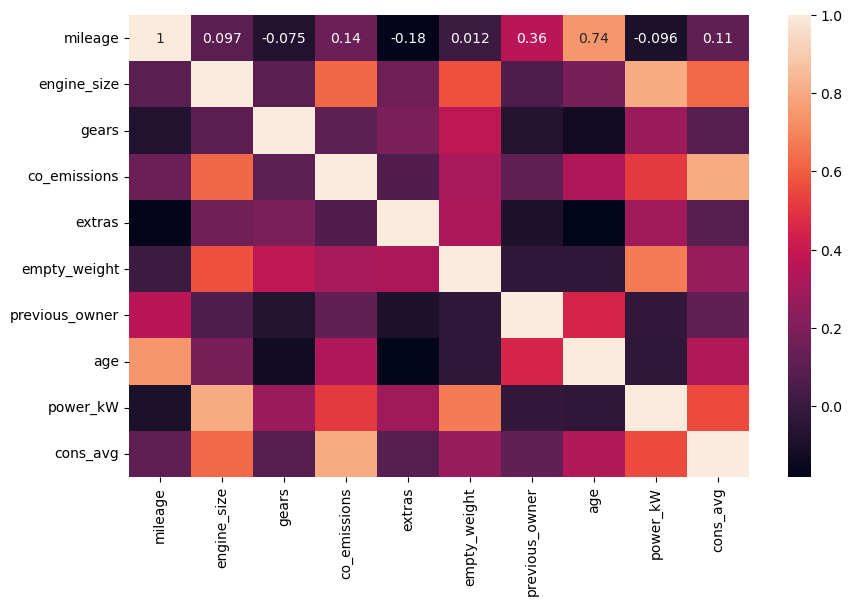

In [40]:
df_numeric = df.select_dtypes(include ="number")
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr().iloc[1:, 1:], annot =True)

# With the code select_dtypes(include ="number"), we can filter only the numeric features in the df.

In [41]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)]

price  mileage  engine_size  gears  co_emissions  extras  \
price             NaN      NaN          NaN    NaN           NaN     NaN   
mileage           NaN      NaN          NaN    NaN           NaN     NaN   
engine_size       NaN      NaN          NaN    NaN           NaN     NaN   
gears             NaN      NaN          NaN    NaN           NaN     NaN   
co_emissions      NaN      NaN          NaN    NaN           NaN     NaN   
extras            NaN      NaN          NaN    NaN           NaN     NaN   
empty_weight      NaN      NaN          NaN    NaN           NaN     NaN   
previous_owner    NaN      NaN          NaN    NaN           NaN     NaN   
age               NaN      NaN          NaN    NaN           NaN     NaN   
power_kW          NaN      NaN          NaN    NaN           NaN     NaN   
cons_avg          NaN      NaN          NaN    NaN           NaN     NaN   

                empty_weight  previous_owner  age  power_kW  cons_avg  
price                    NaN             NaN  NaN       NaN       NaN  
mileage                  NaN             NaN  NaN       NaN       NaN  
engine_size              NaN             NaN  NaN       NaN       NaN  
gears                    NaN             NaN  NaN       NaN       NaN  
co_emissions             NaN             NaN  NaN       NaN       NaN  
extras                   NaN             NaN  NaN       NaN       NaN  
empty_weight             NaN             NaN  NaN       NaN       NaN  
previous_owner           NaN             NaN  NaN       NaN       NaN  
age                      NaN             NaN  NaN       NaN       NaN  
power_kW                 NaN             NaN  NaN       NaN       NaN  
cons_avg                 NaN             NaN  NaN       NaN       NaN

In [42]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any()

price             False
mileage           False
engine_size       False
gears             False
co_emissions      False
extras            False
empty_weight      False
previous_owner    False
age               False
power_kW          False
cons_avg          False
dtype: bool

In [43]:
df_numeric.corr()[(abs(df_numeric.corr())>= 0.9) & (abs(df_numeric.corr()) < 1)].any().any()

# Corr between +/-0.9 and +/-1. We can check multicollinearity for values with this snippet.

False

### VIF (Variance Inflation Factor) Score for Multicolliniearity

In [44]:
# conda install -c anaconda statsmodels
# !pip install statsmodels

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
X_vif = df_numeric.drop(columns='price')
X_vif.head()

mileage  engine_size  gears  co_emissions  extras  empty_weight  \
0   27150.0       1461.0    6.0         120.0       5        1330.0   
1  157500.0       1991.0    6.0         138.0       6        1295.0   
2   21734.0       1461.0    7.0          99.5       1        1445.0   
3  172700.0       1461.0    7.0          99.5       1        1425.0   
4   18989.0       1461.0    7.0          99.5       1        1455.0   

   previous_owner   age  power_kW  cons_avg  
0             2.0   2.0      85.0       4.5  
1             2.0  12.0      80.0       5.2  
2             2.0   2.0      85.0       3.9  
3             3.0   4.0      80.0       3.7  
4             2.0   2.0      85.0       3.9

In [47]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns

In [48]:
df_vif

features
0         mileage
1     engine_size
2           gears
3    co_emissions
4          extras
5    empty_weight
6  previous_owner
7             age
8        power_kW
9        cons_avg

In [49]:
X_vif.head()

mileage  engine_size  gears  co_emissions  extras  empty_weight  \
0   27150.0       1461.0    6.0         120.0       5        1330.0   
1  157500.0       1991.0    6.0         138.0       6        1295.0   
2   21734.0       1461.0    7.0          99.5       1        1445.0   
3  172700.0       1461.0    7.0          99.5       1        1425.0   
4   18989.0       1461.0    7.0          99.5       1        1455.0   

   previous_owner   age  power_kW  cons_avg  
0             2.0   2.0      85.0       4.5  
1             2.0  12.0      80.0       5.2  
2             2.0   2.0      85.0       3.9  
3             3.0   4.0      80.0       3.7  
4             2.0   2.0      85.0       3.9

In [50]:
variance_inflation_factor(X_vif.values, 0)

# Returns the VIF score of the relationship between the mileage feature at the 0th index of the "X_vif" and other features.

5.471118337441996

In [51]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [52]:
df_vif

#check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

# The features engine_size, gears, co_emissions, empty_weight, power_kW, and cons_avg have a serious multicollinearity 
# problem with other features. In this context, it is necessary to use one of the regularization models for accurate 
# feature selection.

features        VIF
0         mileage   5.471118
1     engine_size  25.196104
2           gears  21.675253
3    co_emissions  23.504770
4          extras   2.780753
5    empty_weight  38.757802
6  previous_owner   4.798746
7             age   6.879670
8        power_kW  17.867896
9        cons_avg  24.705654

## Outliers in Price Column

<Axes: ylabel='price'>

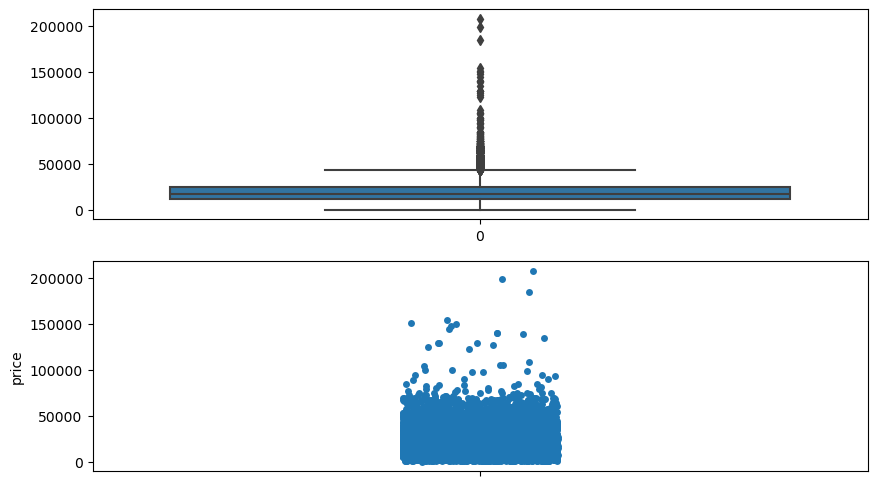

In [53]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price)

# We can get insights about outliers via boxplot. However, these insights can mislead us.
# In order to make more accurate comments, we can use the stripplot showing the distribution
# of categorical and numeric data. Although boxplot treats cars priced at 50 thousand EURO and above as outliers,
# stripplot tells us that the number of cars priced at 50 thousand EURO and around is not very few.
# But as we said above, our evaluation is not for the data in general. We will do it according to
# the groups in the data (Opel Astra, Ford Fiesta, Volvo S60 etc.).

## Interact Plots

In [54]:
#conda install -c anaconda ipywidgets

In [55]:
df[df.make_model=="Volvo V60"]

make_model    price      body_type            type warranty   mileage  \
17606  Volvo V60  10990.0  Station wagon            Used       No  239760.0   
17607  Volvo V60  43900.0  Station wagon            Used       No   92700.0   
17610  Volvo V60  42960.0  Station wagon            Used       No   63054.0   
17611  Volvo V60  10900.0  Station wagon            Used       No  172000.0   
17612  Volvo V60  27490.0  Station wagon            Used      Yes   94358.0   
17614  Volvo V60  32990.0  Station wagon            Used       No   67500.0   
17615  Volvo V60  38990.0  Station wagon            Used       No   52147.0   
17616  Volvo V60  33920.0  Station wagon            Used       No   78211.0   
17617  Volvo V60  20350.0  Station wagon            Used       No   81398.0   
17618  Volvo V60  17990.0  Station wagon            Used      Yes  139803.0   
17619  Volvo V60  38990.0  Station wagon            Used       No   69000.0   
17621  Volvo V60  49940.0  Station wagon   Demonstration      Yes   21000.0   
17622  Volvo V60  33999.0  Station wagon            Used      Yes   28400.0   
17623  Volvo V60  26900.0  Station wagon            Used       No  105000.0   
17625  Volvo V60  46880.0  Station wagon            Used      Yes   21946.0   
17626  Volvo V60  47450.0  Station wagon            Used       No   16714.0   
17627  Volvo V60  31990.0  Station wagon            Used      Yes   95689.0   
17628  Volvo V60  35940.0  Station wagon            Used      Yes   89759.0   
17629  Volvo V60  26950.0  Station wagon            Used       No   46990.0   
17630  Volvo V60  44500.0  Station wagon            Used      Yes    8500.0   
17631  Volvo V60  53990.0  Station wagon   Demonstration      Yes   54034.0   
17633  Volvo V60  18990.0  Station wagon            Used       No  191900.0   
17634  Volvo V60  46980.0  Station wagon            Used      Yes   18846.0   
17635  Volvo V60  22990.0  Station wagon            Used      Yes  111332.0   
17636  Volvo V60  29775.0  Station wagon            Used       No  104900.0   
17637  Volvo V60  23700.0  Station wagon            Used       No   88600.0   
17638  Volvo V60  12250.0  Station wagon            Used      Yes  120752.0   
17641  Volvo V60  36400.0  Station wagon            Used       No   25600.0   
17643  Volvo V60  35960.0  Station wagon            Used      Yes   31588.0   
17644  Volvo V60  26500.0  Station wagon            Used      Yes   74871.0   
17645  Volvo V60  34960.0  Station wagon            Used      Yes   49445.0   
17646  Volvo V60  28330.0  Station wagon            Used       No   48438.0   
17652  Volvo V60  24700.0  Station wagon            Used       No   88600.0   
17653  Volvo V60  45660.0  Station wagon            Used      Yes   15197.0   
17654  Volvo V60  35440.0  Station wagon            Used      Yes   66864.0   
17655  Volvo V60  18990.0  Station wagon            Used      Yes  126603.0   
17657  Volvo V60  58889.0  Station wagon            Used       No   42000.0   
17659  Volvo V60  59780.0  Station wagon            Used       No    2287.0   
17663  Volvo V60   7890.0  Station wagon            Used      Yes  247015.0   
17664  Volvo V60  42450.0  Station wagon            Used      Yes   62914.0   
17666  Volvo V60  36400.0  Station wagon            Used      Yes   23300.0   
17668  Volvo V60  36500.0  Station wagon            Used      Yes   72200.0   
17669  Volvo V60  28990.0  Station wagon            Used      Yes   51662.0   
17671  Volvo V60  35960.0  Station wagon            Used      Yes   30246.0   
17673  Volvo V60  54890.0  Station wagon            Used       No   20394.0   
17676  Volvo V60  48900.0  Station wagon            Used       No    7727.0   
17678  Volvo V60  29950.0  Station wagon            Used       No  116550.0   
17681  Volvo V60  34770.0  Station wagon            Used      Yes   65546.0   
17682  Volvo V60  52900.0  Station wagon            Used      Yes   23434.0   
17684  Volvo V60  41999.0  Station wagon            Used

In [56]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(data = df[df.make_model==model],
                x= "make_model",
                y= "price",
                color="yellow")
    
    sns.stripplot(data = df[df.make_model==model],
                x= "make_model",
                y= "price",
                color="blue")
model = df.make_model.unique()
interact(box_strip, model=model);

# This code defines the function to plot an interactive boxplot and stripplot using the ipywidgets and seaborn libraries.
# The function superimposes the boxplot and stripplot graph showing the prices of different car models covered by the data.
# The interact() function allows the box_strip function to run by selecting the user through the interface.
# This selection determines the car model that will be used to draw the graph.

interactive(children=(Dropdown(description='model', options=('Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra'…

## Count and Rate of Outliers

In [57]:
df.make_model.unique()

# unique groups in our data

array(['Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra', 'Opel Adam',
       'Opel Insignia', 'Opel Cascada', 'Opel Grandland X',
       'Renault Megane', 'Renault Clio', 'Renault Captur',
       'Renault Talisman', 'Renault Kadjar', 'Peugeot 308', 'Peugeot 206',
       'Peugeot 208', 'Peugeot 207', 'Peugeot 3008', 'Peugeot 508',
       'Peugeot RCZ', 'Peugeot 2008', 'Fiat 500', 'Fiat Tipo',
       'Fiat 500X', 'Fiat Panda', 'Fiat 500C', 'SEAT Leon', 'SEAT Ibiza',
       'SEAT Arona', 'SEAT Ateca', 'Skoda Octavia', 'Skoda Scala',
       'Skoda Fabia', 'Skoda Superb', 'Skoda Kodiaq', 'Skoda Karoq',
       'Dacia Sandero', 'Dacia Logan', 'Dacia Duster', 'Toyota Yaris',
       'Toyota Aygo', 'Toyota Corolla', 'Toyota Auris', 'Toyota C-HR',
       'Toyota RAV 4', 'Nissan Micra', 'Nissan Qashqai', 'Nissan Juke',
       'Nissan Pulsar', 'Nissan 370Z', 'Nissan 350Z', 'Nissan X-Trail',
       'Ford Fiesta', 'Ford Focus', 'Ford Mondeo', 'Ford Kuga',
       'Ford Mustang', 'Hyundai i30', 'Hyund

In [58]:
df[df["make_model"]== "Mercedes-Benz A 180"]["price"]

# Prices of Mercedes-Benz A 180s. We will try to determine the outlier values for each car using this code.

0      24400.0
1       7450.0
2      29800.0
3      21000.0
4      26800.0
5      32900.0
6      21000.0
7      32950.0
8      18390.0
9      25900.0
10     25400.0
11     29900.0
12     14490.0
13     20630.0
14      8490.0
15     23850.0
16     29900.0
17     25900.0
18     16700.0
19     23850.0
20     27460.0
21     20630.0
22     21000.0
23     29900.0
24     25600.0
25     26850.0
26     25990.0
27     27800.0
28     29999.0
29     27900.0
30     27490.0
31     24780.0
32      9770.0
33     23850.0
34     31950.0
35     25000.0
36     14700.0
37      8950.0
38     10950.0
39     16750.0
40     12950.0
41     12445.0
42     14945.0
43     16950.0
44     19950.0
45      6400.0
46     13990.0
47     23990.0
48     16800.0
49     23990.0
50     27800.0
51     26850.0
52     31450.0
53     17944.0
54     23536.0
55     12245.0
56     27800.0
57     16945.0
58     26980.0
59     18945.0
60     22950.0
61     12295.0
62     27400.0
63     34950.0
64     35950.0
65     18750.0
66     152

In [59]:
total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)].count()
    # Returns the total number of values that are below the lower limit and above the upper limit.
    
    rate_of_outliers = (count_of_outliers / len(df[df['make_model'] == model])).round(3)
    # We are finding the outlier rate for each make_model.
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<19} : {count_of_outliers:>2}, The rate of outliers : {rate_of_outliers}")
print() 

rate_of_total_outliers=(sum(total_outliers)/len(df)).round(3)
# The ratio of the total number of outliers for all make_models to the overall data

print(f"The Count of total outliers : {sum(total_outliers)}, The rate of total outliers : {rate_of_total_outliers}")

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

 The count of outlier for Mercedes-Benz A 180 :  0, The rate of outliers : 0.0
 The count of outlier for Opel Corsa          :  4, The rate of outliers : 0.011
 The count of outlier for Opel Astra          : 10, The rate of outliers : 0.016
 The count of outlier for Opel Adam           :  1, The rate of outliers : 0.009
 The count of outlier for Opel Insignia       : 19, The rate of outliers : 0.066
 The count of outlier for Opel Cascada        :  1, The rate of outliers : 0.008
 The count of outlier for Opel Grandland X    :  1, The rate of outliers : 0.007
 The count of outlier for Renault Megane      : 38, The rate of outliers : 0.046
 The count of outlier for Renault Clio        :  8, The rate of outliers : 0.02
 The count of outlier for Renault Captur      :  0, The rate of outliers : 0.0
 The count of outlier for Renault Talisman    :  5, The rate of outliers : 0.036
 The count of outlier for Renault Kadjar      :  7, The rate of outliers : 0.055
 The count of outlier for Peugeot

## Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### OneHotEncoder

#### Example

In [60]:
data = {"feature": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], 
        "target": [1,2,3,4,5,6,7,8,9,10]}

data = pd.DataFrame(data)
data

feature  target
0     bad       1
1   worst       2
2    good       3
3    good       4
4     bad       5
5     bed       6
6    good       7
7    good       8
8     bad       9
9     car      10

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["feature"]], data["target"], test_size=0.3, random_state=5)

In [62]:
X_train

feature
4     bad
7    good
1   worst
0     bad
8     bad
6    good
3    good

In [63]:
X_test

feature
9     car
5     bed
2    good

In [64]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")


# OneHotEncoder converts categorical features into dummies 0 and 1 features. If we want our model to treat
# all unique values under the categorical feature equally, we convert our categorical data to 0 and 1 using
# the onehotencoder conversion algorithm. We could also use the get_dummies() function for this conversion,
# but since applying get_dummies() to all data and then separating the data into train and test sets will
# cause data leakege, categorical observations for the data we prepared for ML models dummies features must be
# done with the onehotencoder conversion algorithm.

# However, when converting to categorical data, the following should not be forgotten:
# if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.)
# among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.

# Conversion of categorical data to dummies features is done according to the unique categorical data in
# the train set where the fit operation is performed. With the handle_unknown = "ignore" parameter,
# all categorical data passed in the test set and not in the train set are converted to 0.
# The default for this parameter is handle_unknown = "error". If the handle_unknown parameter remains at
# its default value, the onehotencoder algorithm will fail for an observation that is in the test set but
# not in the train set.

# In sklearn 1.2 versions, with the set_output(transform="pandas") code,
# it transforms the outputs converted into array after conversion into a dataframe
# with the feature names of the data to which it is fitted.

In [65]:
enc.fit_transform(X_train)

# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made 
# according to the unique observations in the train set.
# he set_output(transform="pandas") code formats the new feature names as 
# (old feature name_unique observation name). --> feature_bad, feature_good, etc.

feature_bad  feature_good  feature_worst
4          1.0           0.0            0.0
7          0.0           1.0            0.0
1          0.0           0.0            1.0
0          1.0           0.0            0.0
8          1.0           0.0            0.0
6          0.0           1.0            0.0
3          0.0           1.0            0.0

In [66]:
enc.transform(X_test)

# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1,
# while the non-observations (car, bed) are converted to 0.

feature_bad  feature_good  feature_worst
9          0.0           0.0            0.0
5          0.0           0.0            0.0
2          0.0           1.0            0.0

### OrdinalEncoder

#### Example

In [67]:
data = {"feature": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], 
        "target": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

feature  target
0     bad       1
1   worst       2
2    good       3
3    good       4
4     bad       5
5    good       6
6    good       7
7     bad       8
8    ugly       9
9   worst      10

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data[["feature"]], data["target"], test_size=0.3, random_state=101)

In [69]:
X_train

feature
4     bad
9   worst
3    good
5    good
7     bad
6    good
1   worst

In [70]:
X_test

feature
8    ugly
2    good
0     bad

In [71]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(handle_unknown="use_encoded_value", 
                       unknown_value=-1, 
                       categories= [categories]).set_output(transform="pandas")

# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

# Since there is a hierarchical order between unique observations, we will use ordinalencoder. However, ordinalencoder
# by default makes the transformations according to the order of the ASCII codes of the observations(i.e.,alphabetical order)
# If we do not interfere with the model, the model will make the following order: 'bad':0, 'good':1, 'worst':2. However, 
# since this order is wrong, we need to give the hierarchical order to the model manually. If we give the order as 
# ['worst','bad','good'] as here, the model will make the following transformation: 'worst':0, 'bad':1, 'good':2.

In [72]:
enc_2.fit_transform(X_train)
# After ordinalencoder, the feature name does not change, only the unique categorical data in the feature are 
# converted to numeric observations.

feature
4      1.0
9      0.0
3      2.0
5      2.0
7      1.0
6      2.0
1      0.0

In [73]:
enc_2.transform(X_test)

# ugly converted to -1

feature
8     -1.0
2      2.0
0      1.0

### Train | Test Split

In [74]:
X= df.drop(columns="price")
y= df.price

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Converting Object Features into Numerical Features Using Make Column Transformer

In [76]:
df.select_dtypes(include="object").head(1)

make_model body_type  type warranty gearbox fuel_type  seller  \
0  Mercedes-Benz A 180   Compact  Used      Yes  Manual    Diesel  Dealer   

  drivetrain full_service_history         upholstery energy_efficiency_class  \
0      Front                   No  Part/Full Leather             unefficient   

  comfort_&_convenience_Package entertainment_&_media_Package  \
0                      Standard                          Plus   

  safety_&_security_Package  
0    Safety Premium Package

In [77]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [78]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", 
                                       sparse_output=False), cat_onehot), 
                        (OrdinalEncoder(handle_unknown="use_encoded_value",
                                        unknown_value=-1,
                                        categories=[cat_for_type, 
                                                    cat_for_warranty,
                                                    cat_for_seller,
                                                    cat_for_service_history,
                                                    cat_for_upholstery,
                                                    cat_for_energy,
                                                    cat_for_comfort, 
                                                    cat_for_ent, 
                                                    cat_for_safety]), cat_ordinal),
                         remainder='passthrough', 
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the non-transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder__" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder__", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature_names_out=False.

In [79]:
X_train.head()

make_model      body_type  type warranty   mileage    gearbox  \
16734       Volvo V40        Compact  Used      Yes   98027.0  Automatic   
14781     Ford Mondeo  Station wagon  Used      Yes   17195.0  Automatic   
2414   Renault Megane          Coupe  Used       No  225000.0     Manual   
1430       Opel Astra          Sedan  Used       No   62807.0  Automatic   
1512        Opel Adam          Sedan  Used      Yes   60750.0     Manual   

      fuel_type          seller  engine_size  gears  co_emissions drivetrain  \
16734    Diesel          Dealer       1560.0    6.0          89.0      Front   
14781    Diesel          Dealer       1995.0    8.0         136.0        4WD   
2414    Benzine  Private seller       1998.0    6.0         178.0      Front   
1430    Benzine          Dealer       1364.0    8.0         157.0      Front   
1512    Benzine          Dealer       1398.0    5.0           0.0      Front   

       extras  empty_weight full_service_history         upholstery  \
16734       1        1472.0                   No  Part/Full Leather   
14781       7        1826.0                  Yes  Part/Full Leather   
2414        6        1395.0                   No  Part/Full Leather   
1430        4        1280.0                  Yes              Cloth   
1512        9        1120.0                  Yes              Cloth   

       previous_owner energy_efficiency_class   age  power_kW  cons_avg  \
16734             3.0               efficient   7.0      84.0       3.9   
14781             1.0               efficient   1.0     140.0       5.2   
2414              1.0               efficient  13.0     132.0       7.6   
1430              4.0               efficient   8.0     103.0       6.7   
1512              1.0             unefficient   3.0      74.0       0.0   

      comfort_&_convenience_Package entertainment_&_media_Package  \
16734                      Standard                      Standard   
14781                       Premium                          Plus   
2414                       Standard                      Standard   
1430                        Premium                      Standard   
1512                        Premium                          Plus   

      safety_&_security_Package  
16734    Safety Premium Package  
14781    Safety Premium Package  
2414     Safety Premium Package  
1430     Safety Premium Package  
1512     Safety Premium Package

In [80]:
X_test.head()

make_model         body_type  type warranty  mileage    gearbox  \
15071      Ford Focus             Sedan  Used      Yes  27532.0     Manual   
10999     Toyota Aygo           Compact  Used      Yes  31167.0     Manual   
14000    Ford Mustang       Convertible  Used       No  33800.0  Automatic   
15766  Hyundai TUCSON  Off-Road/Pick-up  Used      Yes  34850.0  Automatic   
4291     Peugeot 3008  Off-Road/Pick-up  Used       No  57430.0  Automatic   

      fuel_type          seller  engine_size  gears  co_emissions drivetrain  \
15071    Diesel          Dealer       1500.0    6.0         109.0      Front   
10999   Benzine          Dealer        998.0    5.0          93.0      Front   
14000   Benzine  Private seller       5083.0    6.0         273.0       Rear   
15766    Diesel          Dealer       1600.0    6.0         129.0      Front   
4291     Diesel          Dealer       1997.0    8.0         129.0      Front   

       extras  empty_weight full_service_history         upholstery  \
15071       8        1280.0                   No              Cloth   
10999       4         985.0                   No              Cloth   
14000       9        1893.0                  Yes  Part/Full Leather   
15766       1        1425.0                   No              Cloth   
4291       15        1555.0                  Yes  Part/Full Leather   

       previous_owner energy_efficiency_class  age  power_kW  cons_avg  \
15071             1.0               efficient  2.0      88.0      3.60   
10999             1.0               efficient  2.0      53.0      4.00   
14000             1.0             unefficient  4.0     310.0     12.50   
15766             1.0             unefficient  4.0     100.0      4.65   
4291              1.0               efficient  3.0     132.0      4.90   

      comfort_&_convenience_Package entertainment_&_media_Package  \
15071                       Premium                          Plus   
10999                      Standard                          Plus   
14000                      Standard                          Plus   
15766                      Standard                      Standard   
4291                        Premium                          Plus   

      safety_&_security_Package  
15071    Safety Premium Package  
10999    Safety Premium Package  
14000    Safety Premium Package  
15766    Safety Premium Package  
4291     Safety Premium Package

In [81]:
X_train.shape, X_test.shape

((14557, 24), (3640, 24))

In [82]:
column_trans.fit_transform(X_train)

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                      0.0                     0.0   
14781                      0.0                     0.0   
2414                       0.0                     0.0   
1430                       0.0                     0.0   
1512                       0.0                     0.0   
...                        ...                     ...   
11284                      0.0                     0.0   
11964                      0.0                     0.0   
5390                       0.0                     0.0   
860                        0.0                     0.0   
15795                      0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                       0.0                  0.0                   0.0   
14781                       0.0                  0.0                   0.0   
2414                        0.0                  0.0                   0.0   
1430                        0.0                  0.0                   0.0   
1512                        0.0                  0.0                   0.0   
...                         ...                  ...                   ...   
11284                       0.0                  0.0                   0.0   
11964                       0.0                  0.0                   0.0   
5390                        0.0                  0.0                   0.0   
860                         0.0                  0.0                   0.0   
15795                       0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                   0.0                    0.0                   0.0   
14781                   0.0                    0.0                   0.0   
2414                    0.0                    0.0                   0.0   
1430                    0.0                    0.0                   0.0   
1512                    0.0                    0.0                   0.0   
...                     ...                    ...                   ...   
11284                   0.0                    0.0                   0.0   
11964                   0.0                    0.0                   0.0   
5390                    0.0                    1.0                   0.0   
860                     0.0                    0.0                   0.0   
15795                   0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                     0.0                    0.0                   0.0   
14781                     0.0                    0.0                   0.0   
2414                      0.0                    0.0                   0.0   
1430                      0.0                    0.0                   0.0   
1512                      0.0                    0.0                   0.0   
...                       ...                    ...                   ...   
11284                     0.0                    0.0                   0.0   
11964                     0.0                    0.0                   0.0   
5390                      0.0                    0.0                   0.0   
860                       0.0                    0.0                   0.0   
15795                     0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                     0.0                      0.0   
14781                     1.0                      0.0   
2414                      0.0                      0.0   
1430                      0.0                      0.0   
1512                      0.0                      0.0   
...                       ...                      ...   
11284                     0.0                      0.0   
11964                     0.0                      0.0   
5

In [83]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [84]:
X_train_trans.shape, X_test_trans.shape

((14557, 105), (3640, 105))

In [85]:
X_train_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                      0.0                     0.0   
14781                      0.0                     0.0   
2414                       0.0                     0.0   
1430                       0.0                     0.0   
1512                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                       0.0                  0.0                   0.0   
14781                       0.0                  0.0                   0.0   
2414                        0.0                  0.0                   0.0   
1430                        0.0                  0.0                   0.0   
1512                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                   0.0                    0.0                   0.0   
14781                   0.0                    0.0                   0.0   
2414                    0.0                    0.0                   0.0   
1430                    0.0                    0.0                   0.0   
1512                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                     0.0                    0.0                   0.0   
14781                     0.0                    0.0                   0.0   
2414                      0.0                    0.0                   0.0   
1430                      0.0                    0.0                   0.0   
1512                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                     0.0                      0.0   
14781                     1.0                      0.0   
2414                      0.0                      0.0   
1430                      0.0                      0.0   
1512                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
16734                       0.0                        0.0   
14781                       0.0                        0.0   
2414                        0.0                        0.0   
1430                        0.0                        0.0   
1512                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
16734                             0.0                     0.0   
14781                             0.0                     0.0   
2414                              0.0                     0.0   
1430                              0.0                     0.0   
1512                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
16734                      0.0                       0.0   
14781                      0.0                       0.0   
2414                       0.0                       0.0   
1430                       0.0                       0.0   
1512                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
16734                        0.0        

In [86]:
X_test_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
15071                      0.0                     0.0   
10999                      0.0                     0.0   
14000                      0.0                     0.0   
15766                      0.0                     0.0   
4291                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
15071                       0.0                  0.0                   0.0   
10999                       0.0                  0.0                   0.0   
14000                       0.0                  0.0                   0.0   
15766                       0.0                  0.0                   0.0   
4291                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
15071                   0.0                    0.0                   0.0   
10999                   0.0                    0.0                   0.0   
14000                   0.0                    0.0                   0.0   
15766                   0.0                    0.0                   0.0   
4291                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
15071                     0.0                    1.0                   0.0   
10999                     0.0                    0.0                   0.0   
14000                     0.0                    0.0                   0.0   
15766                     0.0                    0.0                   0.0   
4291                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
15071                     0.0                      0.0   
10999                     0.0                      0.0   
14000                     0.0                      1.0   
15766                     0.0                      0.0   
4291                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
15071                       0.0                        0.0   
10999                       0.0                        0.0   
14000                       0.0                        0.0   
15766                       0.0                        1.0   
4291                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
15071                             0.0                     0.0   
10999                             0.0                     0.0   
14000                             0.0                     0.0   
15766                             0.0                     0.0   
4291                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
15071                      0.0                       0.0   
10999                      0.0                       0.0   
14000                      0.0                       0.0   
15766                      0.0                       0.0   
4291                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
15071                        0.0        

## After Transformation, Correlations between Features

In [87]:
X_train_trans.join(y_train).corr()

# Let's see the relationships between Target and features.

make_model_Dacia Duster  \
make_model_Dacia Duster                        1.000000   
make_model_Dacia Logan                        -0.014201   
make_model_Dacia Sandero                      -0.027729   
make_model_Fiat 500                           -0.020825   
make_model_Fiat 500C                          -0.016067   
make_model_Fiat 500X                          -0.020054   
make_model_Fiat Panda                         -0.011264   
make_model_Fiat Tipo                          -0.021022   
make_model_Ford Fiesta                        -0.020792   
make_model_Ford Focus                         -0.022968   
make_model_Ford Kuga                          -0.015338   
make_model_Ford Mondeo                        -0.013072   
make_model_Ford Mustang                       -0.025390   
make_model_Hyundai IONIQ                      -0.010904   
make_model_Hyundai TUCSON                     -0.015072   
make_model_Hyundai i20                        -0.013325   
make_model_Hyundai i30                        -0.027420   
make_model_Mercedes-Benz A 180                -0.011264   
make_model_Nissan 350Z                        -0.011264   
make_model_Nissan 370Z                        -0.012282   
make_model_Nissan Juke                        -0.010532   
make_model_Nissan Micra                       -0.020020   
make_model_Nissan Pulsar                      -0.011145   
make_model_Nissan Qashqai                     -0.023148   
make_model_Nissan X-Trail                     -0.011498   
make_model_Opel Adam                          -0.011145   
make_model_Opel Astra                         -0.026582   
make_model_Opel Cascada                       -0.011840   
make_model_Opel Corsa                         -0.019466   
make_model_Opel Grandland X                   -0.011784   
make_model_Opel Insignia                      -0.017478   
make_model_Peugeot 2008                       -0.012228   
make_model_Peugeot 206                        -0.011840   
make_model_Peugeot 207                        -0.012814   
make_model_Peugeot 208                        -0.016523   
make_model_Peugeot 3008                       -0.014938   
make_model_Peugeot 308                        -0.024148   
make_model_Peugeot 508                        -0.013963   
make_model_Peugeot RCZ                        -0.014938   
make_model_Renault Captur                     -0.013123   
make_model_Renault Clio                       -0.020627   
make_model_Renault Kadjar                     -0.011784   
make_model_Renault Megane                     -0.030056   
make_model_Renault Talisman                   -0.012228   
make_model_SEAT Arona                         -0.013072   
make_model_SEAT Ateca                         -0.013915   
make_model_SEAT Ibiza                         -0.021282   
make_model_SEAT Leon                          -0.028464   
make_model_Skoda Fabia                        -0.016109   
make_model_Skoda Karoq                        -0.012118   
make_model_Skoda Kodiaq                       -0.012336   
make_model_Skoda Octavia                      -0.019745   
make_model_Skoda Scala                        -0.014059   
make_model_Skoda Superb                       -0.014528   
make_model_Toyota Auris                       -0.015425   
make_model_Toyota Aygo                        -0.010843   
make_model_Toyota C-HR                        -0.012228   
make_model_Toyota Corolla                     -0.013623   
make_model_Toyota RAV 4                       -0.010405   
make_model_Toyota Yaris                       -0.018825   
make_model_Volvo C30                          -0.011440   
make_model_Volvo C70                          -0.017555   
make_model_Volvo S60                          -0.011498   
make_model_Volvo S90                          -0.010595   
make_model_Volvo V40                          -0.021347   
make_model_Volvo V60                          -0.012604   
make_model_Volvo V90                          -0.010720   
make_model_Volvo XC4

In [88]:
# conda install -c conda-forge plotly

In [89]:
import plotly.express as px

corr = X_train_trans.join(y_train).corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show();

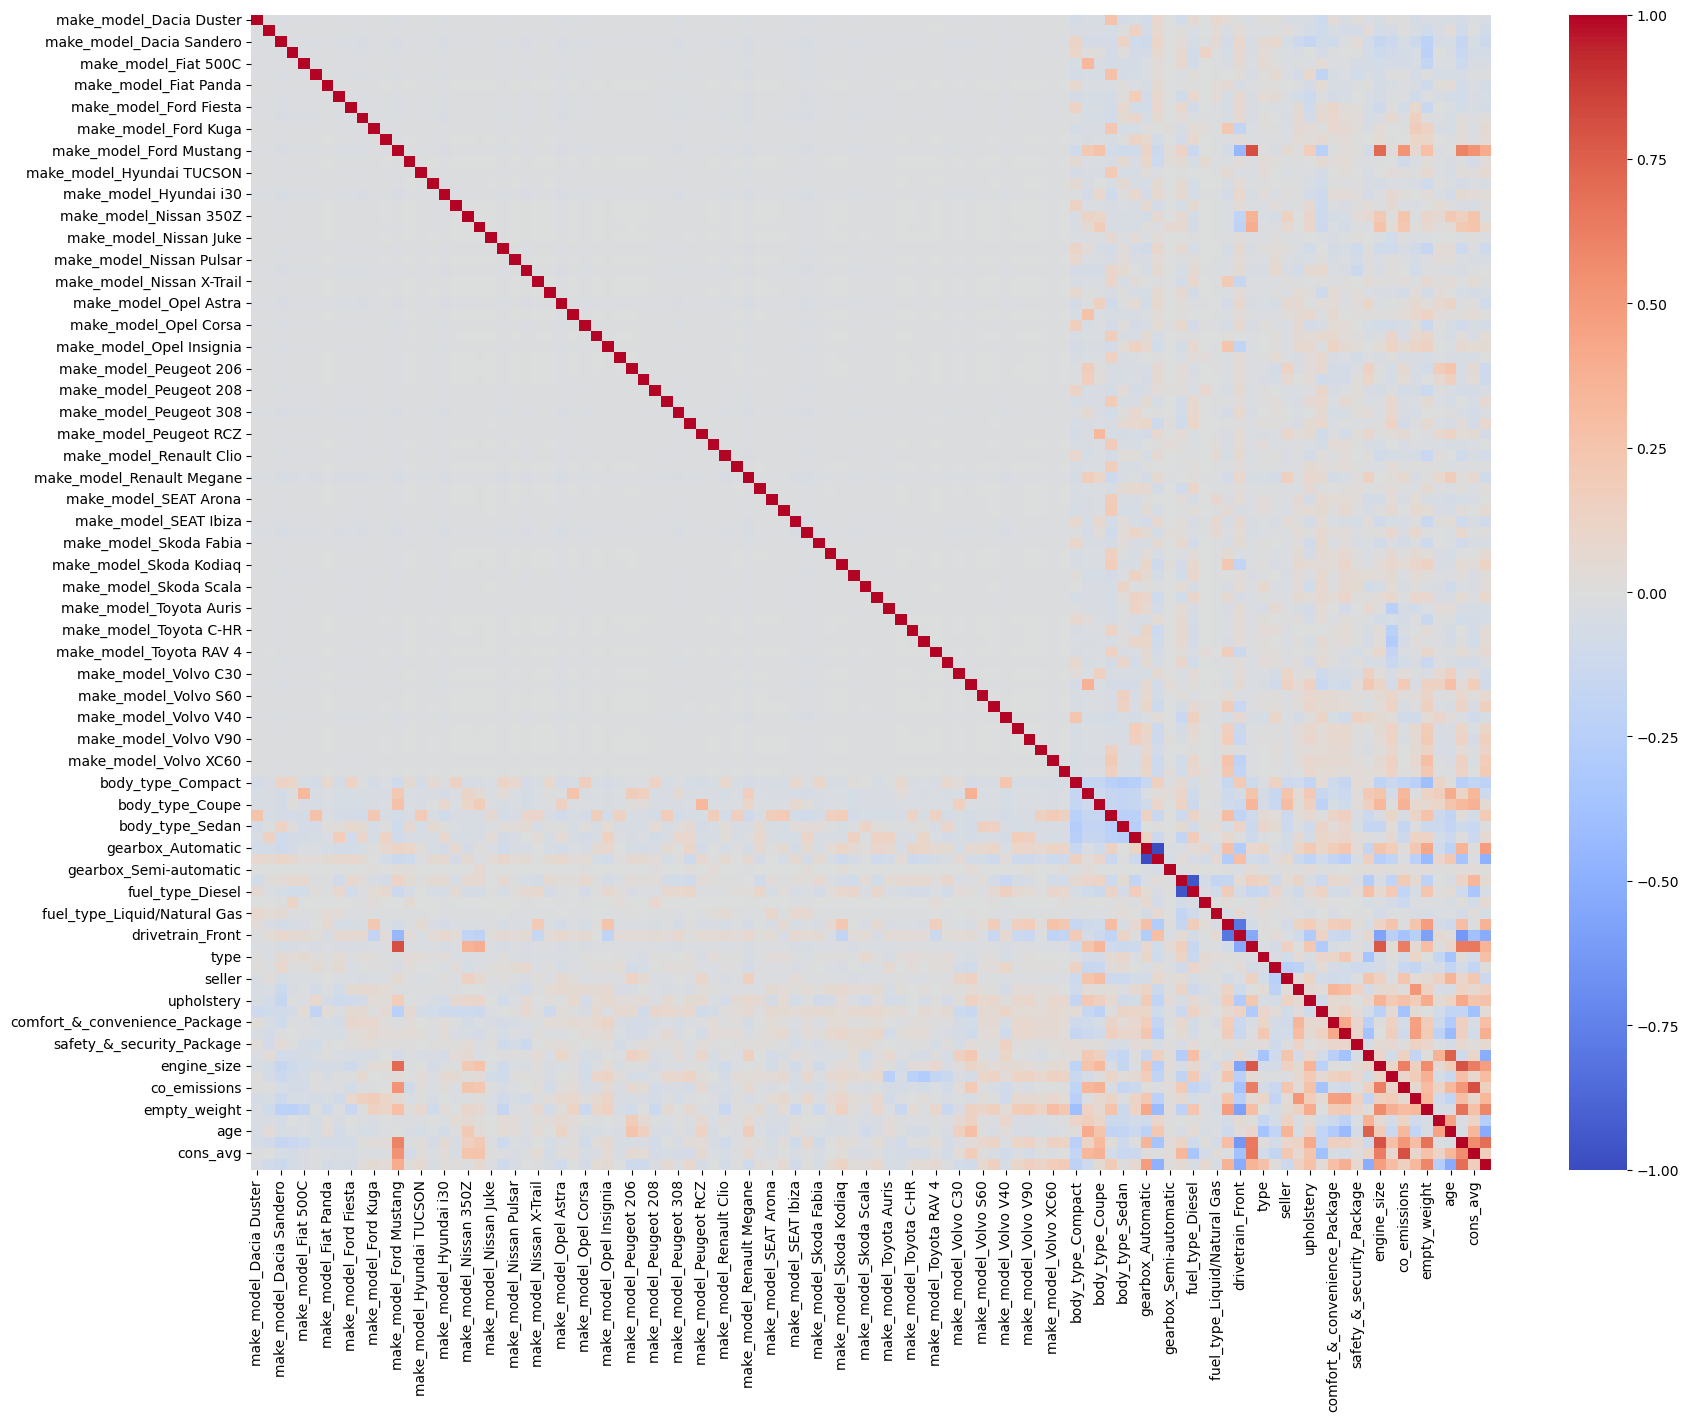

In [90]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

### Scaling

In [91]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [92]:
X_train_scaled.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
16734                      0.0                     0.0   
14781                      0.0                     0.0   
2414                       0.0                     0.0   
1430                       0.0                     0.0   
1512                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
16734                       0.0                  0.0                   0.0   
14781                       0.0                  0.0                   0.0   
2414                        0.0                  0.0                   0.0   
1430                        0.0                  0.0                   0.0   
1512                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
16734                   0.0                    0.0                   0.0   
14781                   0.0                    0.0                   0.0   
2414                    0.0                    0.0                   0.0   
1430                    0.0                    0.0                   0.0   
1512                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
16734                     0.0                    0.0                   0.0   
14781                     0.0                    0.0                   0.0   
2414                      0.0                    0.0                   0.0   
1430                      0.0                    0.0                   0.0   
1512                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
16734                     0.0                      0.0   
14781                     1.0                      0.0   
2414                      0.0                      0.0   
1430                      0.0                      0.0   
1512                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
16734                       0.0                        0.0   
14781                       0.0                        0.0   
2414                        0.0                        0.0   
1430                        0.0                        0.0   
1512                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
16734                             0.0                     0.0   
14781                             0.0                     0.0   
2414                              0.0                     0.0   
1430                              0.0                     0.0   
1512                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
16734                     0.0                     0.0   
14781                     0.0                     0.0   
2414                      0.0                     0.0   
1430                      0.0                     0.0   
1512                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
16734                      0.0                       0.0   
14781                      0.0                       0.0   
2414                       0.0                       0.0   
1430                       0.0                       0.0   
1512                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
16734                        0.0        

In [93]:
X_test_scaled.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
15071                      0.0                     0.0   
10999                      0.0                     0.0   
14000                      0.0                     0.0   
15766                      0.0                     0.0   
4291                       0.0                     0.0   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
15071                       0.0                  0.0                   0.0   
10999                       0.0                  0.0                   0.0   
14000                       0.0                  0.0                   0.0   
15766                       0.0                  0.0                   0.0   
4291                        0.0                  0.0                   0.0   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
15071                   0.0                    0.0                   0.0   
10999                   0.0                    0.0                   0.0   
14000                   0.0                    0.0                   0.0   
15766                   0.0                    0.0                   0.0   
4291                    0.0                    0.0                   0.0   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
15071                     0.0                    1.0                   0.0   
10999                     0.0                    0.0                   0.0   
14000                     0.0                    0.0                   0.0   
15766                     0.0                    0.0                   0.0   
4291                      0.0                    0.0                   0.0   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
15071                     0.0                      0.0   
10999                     0.0                      0.0   
14000                     0.0                      1.0   
15766                     0.0                      0.0   
4291                      0.0                      0.0   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
15071                       0.0                        0.0   
10999                       0.0                        0.0   
14000                       0.0                        0.0   
15766                       0.0                        1.0   
4291                        0.0                        0.0   

       make_model_Hyundai i20  make_model_Hyundai i30  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
15071                             0.0                     0.0   
10999                             0.0                     0.0   
14000                             0.0                     0.0   
15766                             0.0                     0.0   
4291                              0.0                     0.0   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
15071                     0.0                     0.0   
10999                     0.0                     0.0   
14000                     0.0                     0.0   
15766                     0.0                     0.0   
4291                      0.0                     0.0   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
15071                      0.0                       0.0   
10999                      0.0                       0.0   
14000                      0.0                       0.0   
15766                      0.0                       0.0   
4291                       0.0                       0.0   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
15071                        0.0        

## Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [94]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : root_mean_squared_error(y_train, y_train_pred),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : root_mean_squared_error(y_test, y_pred),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [95]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [96]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train          test
R2    8.314993e-01  8.305738e-01
mae   2.855057e+03  2.821062e+03
mse   2.708983e+07  2.454840e+07
rmse  5.204790e+03  4.954634e+03
mape  2.020319e-01  1.923983e-01

In [97]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.831        0.831
mae      2855.057     2821.062
mse  27089834.704 24548395.821
rmse     5204.790     4954.634
mape        0.202        0.192

### Adjusted R2 Score

In [98]:
def adj_r2(actual, prediction, X):
    r2 = r2_score(actual, prediction)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# If there are too many features in our data, but not enough rows, which makes a false improvement in our model's R2_score.
# Especially in such data or if too many new features (such as dummies feature) have been added to our data.
# We need to detect the real R2_score with adjusted R2_score.

# Adjusted R2_score Checks the trade off between the number of rows and the feature,
# and returns us a score. If there is a large imbalance between the numbers,
# there will be serious decreases in the adjusted_R2_score.

# We define the above function for Adjusted R2 Score.

In [99]:
y_pred = lm.predict(X_test_scaled)
y_train_pred=lm.predict(X_train_scaled)

# We take our predictions (y_pred, y_train_pred) from the model to use in the function we defined above.

In [100]:
print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test_scaled))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train_scaled))

# We obtain our score by giving the necessary parameters to the function.

test adj_R2 score  : 0.8255399352018309
train adj_R2 score : 0.8302750000370474


### Cross Validate

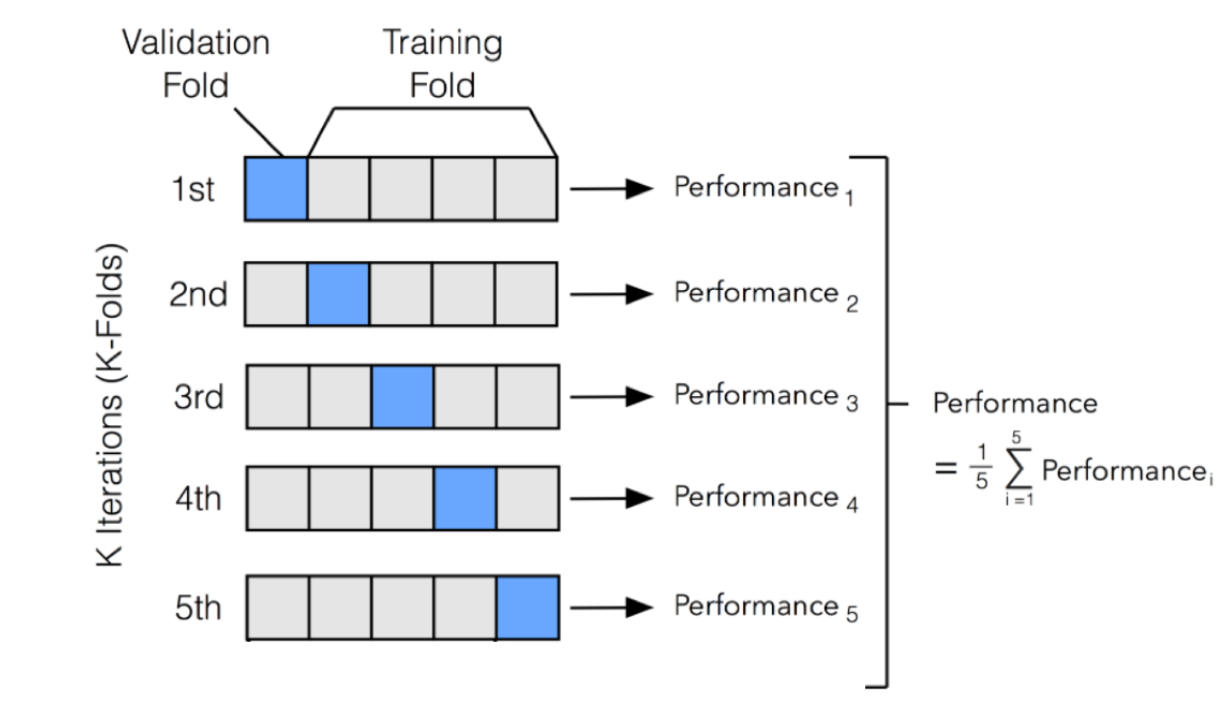

In [101]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

In [102]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True) # return_indices=True (for sklearn >= 1.3)
                                


# As we learned in our previous lessons, we perform the overfiting control by comparing the train and
# validation scores we receive through cross validaition.

# return_indices=True, returns the index numbers of the train and validation data in each iteration

In [103]:
scores_df=pd.DataFrame(scores)
scores_df.mean()[2:]

# We see that the scores between the train and validaiton set and the train set are close to each other.
# There is no overfitting.

test_r2                                            0.831
train_r2                                           0.832
test_neg_mean_absolute_error                   -2874.674
train_neg_mean_absolute_error                  -2854.218
test_neg_mean_squared_error                -27489870.737
train_neg_mean_squared_error               -27071246.820
test_neg_root_mean_squared_error               -5197.342
train_neg_root_mean_squared_error              -5202.363
test_neg_mean_absolute_percentage_error           -0.203
train_neg_mean_absolute_percentage_error          -0.202
dtype: float64

In [104]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.831        0.831
mae      2855.057     2821.062
mse  27089834.704 24548395.821
rmse     5204.790     4954.634
mape        0.202        0.192

### Prediction Error with Outliers

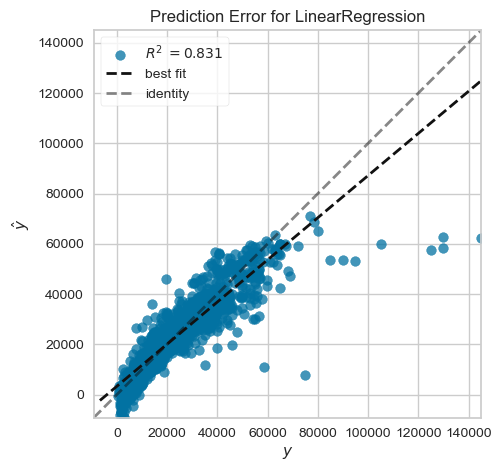

In [105]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# From prediciton error chart, we can see how good our model's predictions are. When we look at the image below,
# we can see that cars with prices of 70 thousand EURO and above are pulling our best fit line down.
# If I drop the very low-priced cars that I see from the data that break my scores,
# the cars with 70 thousand EURO and above, or the outlier-priced cars that I have determined on
# the basis of models from my data and retrain the model from this data, I can get better scores.

# We will continue to drop cars with very low prices and cars over 70.000 EURO in this notebook.

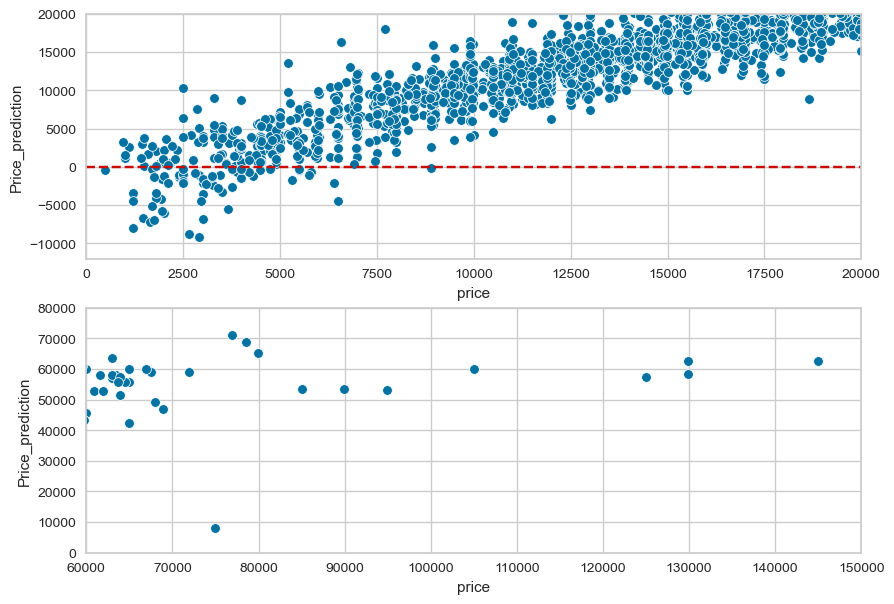

In [106]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("Price_prediction")
plt.xlim([0,20000])
plt.ylim([-12000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred)
plt.ylabel("Price_prediction")
plt.xlim([60000, 150000])
plt.ylim([0,80000])
plt.show();

# We see that our model does not learn well about the car prices of 7500 EURO and below and over 70 thousand EURO.
# The question that immediately comes to our mind should be: What is the distribution of car prices below 7500 EURO
# and above 70 thousand EURO in the residual plot? We will look at the residual plot below and see
# if linear regression is a good choice for the determination of the car prices we mentioned.

### Residual Plot with Outliers

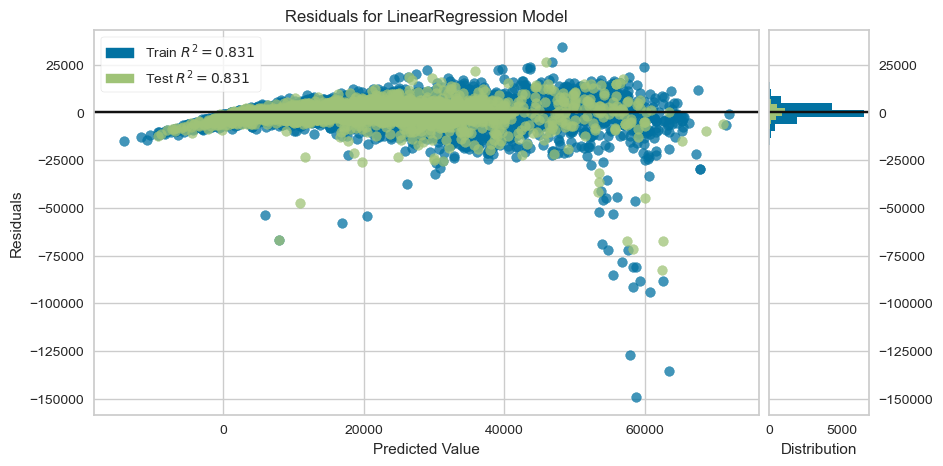

In [107]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# The data from the residual plot clearly shows that linear regression is not suitable for cheap and high priced cars.

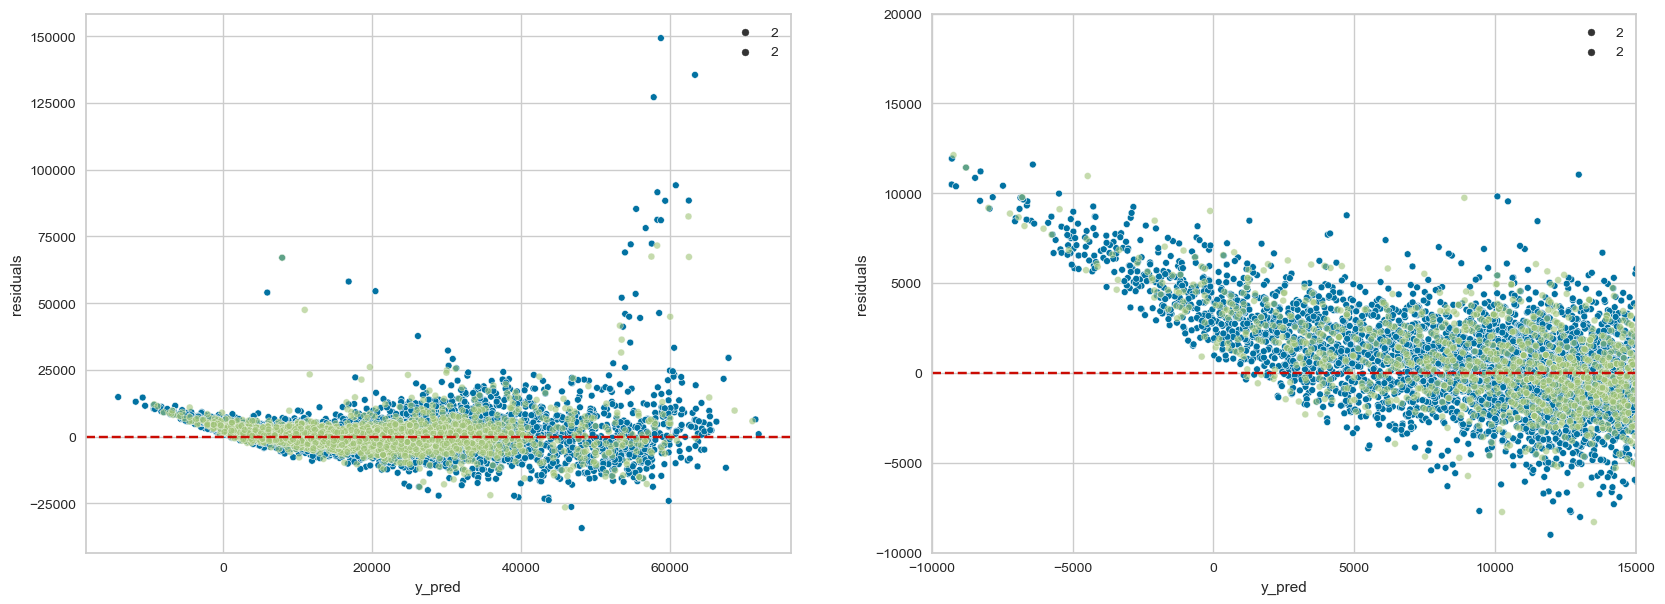

In [108]:
y_pred=lm.predict(X_test_scaled)
y_pred_train = lm.predict(X_train_scaled)

residual_test = y_test-y_pred
residual_train = y_train-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred_train, y = residual_train, color="b", size=2)
sns.scatterplot(x = y_pred, y = residual_test, color="g", size=2, alpha=0.6)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();

# When we look at the residuals plot, we can see that the problem is that low-priced cars and high-priced cars
# that do not have a balanced distribution around the 0 axis disrupt the distribution in the residual plot.

# For this, we will drop the cars below 7500 EURO and above 70 thousand EURO,
# which the model made bad predictions above, from our data.
# Then we will observe our scores again.

In [109]:
dict_train= {"y_train": y_train, "y_train_pred":y_pred_train}
dict_test={"y_test":y_test, "y_pred":y_pred}

In [110]:
df_train=pd.DataFrame(dict_train).sort_values(by="y_train")
df_train.head(100)

y_train  y_train_pred
2104   699.000     -2944.000
2326   790.000      1156.000
2887   790.000     -2428.000
3938   790.000      -724.000
821    800.000    -14064.000
2182   890.000     -4932.000
3943   890.000     -2036.000
3845   890.000      -704.000
3925   900.000      -896.000
3631   950.000      1072.000
3907   950.000       188.000
3847   950.000      2304.000
2164   995.000     -3792.000
4869   999.000     -5028.000
3869   999.000      2280.000
4717   999.000        28.000
8190   999.000     -4784.000
3860  1000.000     -2548.000
3851  1000.000     -2576.000
837   1000.000     -5672.000
3955  1100.000     -1556.000
1583  1150.000    -10448.000
470   1195.000     -7944.000
3939  1200.000     -1000.000
2457  1200.000       452.000
456   1200.000     -9288.000
674   1250.000     -9136.000
4210  1290.000      5492.000
14930 1299.000     -8280.000
4027  1300.000      4040.000
463   1300.000     -5388.000
3923  1350.000     -4300.000
787   1350.000     -3148.000
3936  1350.000      1448.000
758   1399.000    -11712.000
7064  1400.000     -7040.000
8493  1400.000     -1596.000
3278  1400.000     -5176.000
3931  1400.000       432.000
3979  1445.000     -2156.000
2033  1450.000       956.000
477   1450.000     -5428.000
3946  1450.000     -1040.000
10483 1490.000      -468.000
3921  1495.000     -1812.000
2066  1499.000     -1296.000
3775  1500.000      4036.000
10452 1500.000       704.000
3883  1500.000     -1068.000
3889  1500.000      3232.000
650   1500.000      5536.000
3861  1550.000      3320.000
7240  1550.000     -1888.000
2212  1595.000     -5072.000
3920  1599.000      4952.000
17227 1600.000       320.000
812   1600.000     -5080.000
17156 1600.000       980.000
12652 1600.000     -4216.000
712   1600.000      2776.000
3915  1600.000      -772.000
9010  1600.000     -7016.000
10645 1650.000      -188.000
3901  1650.000      2792.000
3940  1650.000       324.000
580   1695.000      2428.000
801   1700.000     -1544.000
800   1700.000     -1724.000
2288  1700.000      4736.000
2068  1750.000      9436.000
3908  1750.000      1548.000
3867  1750.000      1884.000
634   1750.000      1992.000
3906  1750.000      2004.000
7336  1750.000      -268.000
7299  1750.000     -4784.000
3916  1750.000     -2968.000
3515  1750.000     -4240.000
2155  1790.000     -2760.000
636   1795.000     -1488.000
2098  1799.000     -3072.000
12036 1799.000     -5600.000
2229  1800.000      2384.000
10486 1849.000     -4408.000
3935  1850.000      1096.000
3862  1850.000      3312.000
3882  1850.000      2040.000
3952  1850.000        -8.000
4259  1890.000       636.000
2203  1890.000     -1728.000
704   1899.000      -320.000
2272  1900.000     -1580.000
832   1900.000      -588.000
3432  1900.000     -6632.000
1900  1950.000     -3160.000
637   1950.000     -4964.000
15342 1950.000     -5156.000
3874  1950.000      1924.000
3863  1950.000        24.000
12475 1950.000       324.000

In [111]:
df_test=pd.DataFrame(dict_test).sort_values(by="y_test")
df_test.head(100)

y_test    y_pred
2458   490.000  -416.000
3886   950.000  3260.000
3848   999.000  1196.000
3894   999.000  1576.000
3989  1100.000  2564.000
3788  1199.000 -4520.000
902   1200.000 -7984.000
2281  1200.000 -3432.000
3919  1400.000  1200.000
3993  1440.000  3032.000
884   1475.000 -6704.000
856   1499.000    80.000
2069  1500.000  3796.000
2140  1600.000  1700.000
5359  1650.000 -7220.000
2111  1700.000 -5132.000
10431 1700.000  2728.000
3971  1700.000  -316.000
2254  1750.000 -1288.000
1887  1750.000 -6912.000
10746 1790.000   132.000
878   1790.000 -3388.000
3942  1799.000  2132.000
17217 1800.000 -4108.000
3995  1899.000   536.000
820   1940.000 -4136.000
1795  1950.000 -5744.000
12044 1950.000 -1608.000
3944  1980.000  1068.000
3986  1980.000   780.000
2078  1999.000 -1152.000
12041 1999.000 -6028.000
13083 2000.000  2168.000
651   2000.000   944.000
3975  2050.000  3648.000
12471 2100.000 -2096.000
829   2100.000   208.000
2117  2150.000   504.000
3846  2200.000  2728.000
13019 2299.000   996.000
2087  2350.000  2184.000
2232  2390.000 -1324.000
2184  2400.000 -1004.000
12381 2499.000 -2092.000
3269  2499.000 -1140.000
2214  2499.000  6444.000
10497 2499.000  -992.000
903   2500.000  -304.000
7092  2500.000  3952.000
16886 2500.000 10240.000
12659 2500.000 -1876.000
1807  2650.000 -8780.000
17229 2699.000  4220.000
1984  2745.000   872.000
12656 2800.000  -860.000
2039  2850.000  7508.000
3800  2890.000  3280.000
6956  2900.000 -9224.000
3601  2900.000  5060.000
10662 2900.000 -1076.000
12404 2950.000 -4496.000
2112  2999.000  4040.000
6931  2999.000 -3588.000
10615 2999.000 -6784.000
828   2999.000  3252.000
2146  3000.000 -1616.000
17225 3000.000 -2164.000
750   3000.000  3768.000
12119 3100.000 -2180.000
795   3199.000 -1812.000
11160 3245.000 -1224.000
7077  3250.000 -1300.000
5194  3280.000 -2336.000
4730  3295.000  9032.000
10563 3300.000  1152.000
2267  3300.000  3872.000
2081  3300.000  5508.000
2177  3300.000  4868.000
4671  3390.000  2944.000
474   3390.000  1148.000
601   3400.000 -2700.000
1890  3445.000  1596.000
2085  3450.000 -1072.000
12030 3490.000  1732.000
2095  3500.000  4224.000
3263  3500.000  5000.000
673   3500.000  3776.000
14017 3500.000  5392.000
2266  3500.000 -3344.000
2225  3600.000   520.000
10887 3600.000   316.000
617   3650.000 -5460.000
2450  3695.000  3172.000
751   3750.000  4120.000
817   3750.000  -240.000
11124 3750.000 -2648.000
4254  3800.000  4676.000
16176 3800.000  1480.000
2252  3850.000    84.000
169   3900.000  -624.000

## Filtering Data and Rebuilding The Model

In [112]:
df = df[(df.price > 7500)&(df.price <70000)]
df

make_model     price body_type            type warranty  \
0      Mercedes-Benz A 180 24400.000   Compact            Used      Yes   
2      Mercedes-Benz A 180 29800.000   Compact            Used      Yes   
3      Mercedes-Benz A 180 21000.000   Compact            Used      Yes   
4      Mercedes-Benz A 180 26800.000   Compact            Used      Yes   
5      Mercedes-Benz A 180 32900.000   Compact  Pre-registered      Yes   
...                    ...       ...       ...             ...      ...   
18190            Volvo S90 27190.000     Sedan            Used      Yes   
18191            Volvo S90 27190.000     Sedan            Used      Yes   
18192            Volvo V40 13000.000     Sedan            Used       No   
18194            Volvo S90 37600.000     Sedan            Used      Yes   
18196            Volvo S90 29900.000     Sedan            Used      Yes   

         mileage    gearbox fuel_type          seller  engine_size  gears  \
0      27150.000     Manual    Diesel          Dealer     1461.000  6.000   
2      21734.000  Automatic    Diesel          Dealer     1461.000  7.000   
3     172700.000  Automatic    Diesel          Dealer     1461.000  7.000   
4      18989.000  Automatic    Diesel          Dealer     1461.000  7.000   
5         25.000     Manual   Benzine          Dealer     1332.000  6.000   
...          ...        ...       ...             ...          ...    ...   
18190  93757.000  Automatic    Diesel          Dealer     1969.000  8.000   
18191  93757.000  Automatic    Diesel          Dealer     1969.000  8.000   
18192 114000.000     Manual    Diesel  Private seller     1969.000  6.000   
18194  40345.000  Automatic    Diesel          Dealer     1969.000  8.000   
18196  94343.000  Automatic   Benzine          Dealer     1969.000  8.000   

       co_emissions drivetrain  extras  empty_weight full_service_history  \
0           120.000      Front       5      1330.000                   No   
2            99.500      Front       1      1445.000                   No   
3            99.500      Front       1      1425.000                   No   
4            99.500      Front       1      1455.000                   No   
5           126.000      Front       1      1350.000                   No   
...             ...        ...     ...           ...                  ...   
18190       127.000      Front       1      1683.000                   No   
18191       127.000      Front       1      1683.000                   No   
18192        94.000      Front       9      1532.000                  Yes   
18194       127.000        4WD       1      2077.000                   No   
18196       149.000        4WD       2      1617.000                  Yes   

              upholstery  previous_owner energy_efficiency_class   age  \
0      Part/Full Leather           2.000             unefficient 2.000   
2                  Cloth           2.000             unefficient 2.000   
3                  Cloth           3.000             unefficient 4.000   
4                  Cloth           2.000             unefficient 2.000   
5                  Cloth           1.000             unefficient 1.000   
...                  ...             ...                     ...   ...   
18190  Part/Full Leather           1.000               efficient 4.000   
18191  Part/Full Leather           1.000               efficient 4.000   
18192              Cloth           1.000               efficient 4.000   
18194  Part/Full Leather           2.000               efficient 3.000   
18196  Part/Full Leather           1.000               efficient 5.000   

       power_kW  cons_avg comfort_&_convenience_Package  \
0        85.000     4.500                      Standard   
2        85.000     3.900                      Standard   
3        80.000     3.700                      Standard   
4        85.000     3.900                      Standard   
5       100.000     0.000                      Standard   
...         ...       

In [113]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [114]:
X_train_trans= column_trans.fit_transform(X_train)
X_test_trans= column_trans.transform(X_test)

In [115]:
X_train_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
7674                     0.000                   0.000   
13227                    0.000                   0.000   
8532                     0.000                   0.000   
4458                     0.000                   0.000   
15437                    0.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
7674                      0.000                0.000                 0.000   
13227                     0.000                0.000                 0.000   
8532                      0.000                0.000                 0.000   
4458                      0.000                0.000                 0.000   
15437                     0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
7674                  0.000                  0.000                 0.000   
13227                 0.000                  0.000                 0.000   
8532                  0.000                  0.000                 0.000   
4458                  0.000                  0.000                 0.000   
15437                 0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
7674                    0.000                  0.000                 0.000   
13227                   0.000                  0.000                 0.000   
8532                    0.000                  0.000                 0.000   
4458                    0.000                  0.000                 0.000   
15437                   0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
7674                    0.000                    0.000   
13227                   0.000                    0.000   
8532                    0.000                    0.000   
4458                    0.000                    0.000   
15437                   0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
7674                      0.000                      0.000   
13227                     0.000                      0.000   
8532                      0.000                      0.000   
4458                      0.000                      0.000   
15437                     0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
7674                    0.000                   0.000   
13227                   0.000                   0.000   
8532                    0.000                   0.000   
4458                    0.000                   0.000   
15437                   0.000                   1.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
7674                            0.000                   0.000   
13227                           0.000                   0.000   
8532                            0.000                   0.000   
4458                            0.000                   0.000   
15437                           0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
7674                    0.000                   0.000   
13227                   0.000                   0.000   
8532                    0.000                   0.000   
4458                    0.000                   0.000   
15437                   0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
7674                     0.000                     0.000   
13227                    1.000                     0.000   
8532                     0.000                     0.000   
4458                     0.000                     0.000   
15437                    0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
7674                       0.000        

In [116]:
X_test_trans.head()

make_model_Dacia Duster  make_model_Dacia Logan  \
5621                     0.000                   0.000   
14584                    0.000                   0.000   
8666                     0.000                   0.000   
15746                    0.000                   0.000   
10258                    1.000                   0.000   

       make_model_Dacia Sandero  make_model_Fiat 500  make_model_Fiat 500C  \
5621                      0.000                0.000                 1.000   
14584                     0.000                0.000                 0.000   
8666                      0.000                0.000                 0.000   
15746                     0.000                0.000                 0.000   
10258                     0.000                0.000                 0.000   

       make_model_Fiat 500X  make_model_Fiat Panda  make_model_Fiat Tipo  \
5621                  0.000                  0.000                 0.000   
14584                 0.000                  0.000                 0.000   
8666                  0.000                  0.000                 0.000   
15746                 0.000                  0.000                 0.000   
10258                 0.000                  0.000                 0.000   

       make_model_Ford Fiesta  make_model_Ford Focus  make_model_Ford Kuga  \
5621                    0.000                  0.000                 0.000   
14584                   0.000                  0.000                 1.000   
8666                    0.000                  0.000                 0.000   
15746                   0.000                  0.000                 0.000   
10258                   0.000                  0.000                 0.000   

       make_model_Ford Mondeo  make_model_Ford Mustang  \
5621                    0.000                    0.000   
14584                   0.000                    0.000   
8666                    0.000                    0.000   
15746                   0.000                    0.000   
10258                   0.000                    0.000   

       make_model_Hyundai IONIQ  make_model_Hyundai TUCSON  \
5621                      0.000                      0.000   
14584                     0.000                      0.000   
8666                      0.000                      0.000   
15746                     0.000                      1.000   
10258                     0.000                      0.000   

       make_model_Hyundai i20  make_model_Hyundai i30  \
5621                    0.000                   0.000   
14584                   0.000                   0.000   
8666                    0.000                   0.000   
15746                   0.000                   0.000   
10258                   0.000                   0.000   

       make_model_Mercedes-Benz A 180  make_model_Nissan 350Z  \
5621                            0.000                   0.000   
14584                           0.000                   0.000   
8666                            0.000                   0.000   
15746                           0.000                   0.000   
10258                           0.000                   0.000   

       make_model_Nissan 370Z  make_model_Nissan Juke  \
5621                    0.000                   0.000   
14584                   0.000                   0.000   
8666                    0.000                   0.000   
15746                   0.000                   0.000   
10258                   0.000                   0.000   

       make_model_Nissan Micra  make_model_Nissan Pulsar  \
5621                     0.000                     0.000   
14584                    0.000                     0.000   
8666                     0.000                     0.000   
15746                    0.000                     0.000   
10258                    0.000                     0.000   

       make_model_Nissan Qashqai  make_model_Nissan X-Trail  \
5621                       0.000        

In [117]:
scaler = MinMaxScaler().set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [118]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [119]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

train         test
R2          0.880        0.876
mae      2583.593     2499.812
mse  14152774.024 13462202.177
rmse     3762.017     3669.087
mape        0.131        0.131

In [120]:
model = LinearRegression()

scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'], 
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

# We are checking overfitting according to our new data.
# Since train and test scores and error rates are close, we can say there is no overfitting.

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2606.044
train_neg_mean_absolute_error                  -2582.427
test_neg_mean_squared_error                -14447372.054
train_neg_mean_squared_error               -14133368.564
test_neg_root_mean_squared_error               -3796.351
train_neg_root_mean_squared_error              -3759.382
test_neg_mean_absolute_percentage_error           -0.133
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

In [121]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

# We assign the scores to the variables to compare the scores we get from the linear model.

### Prediction Error without Outliers

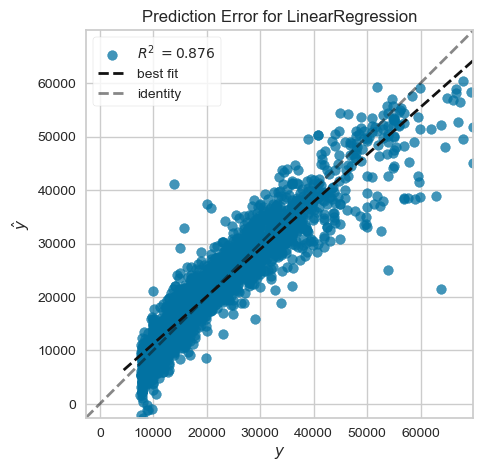

In [122]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();

# After removing the outlier values, we see that the angle between the best fit line and
# the identity line narrows even more.

### Residual Plot without Outliers

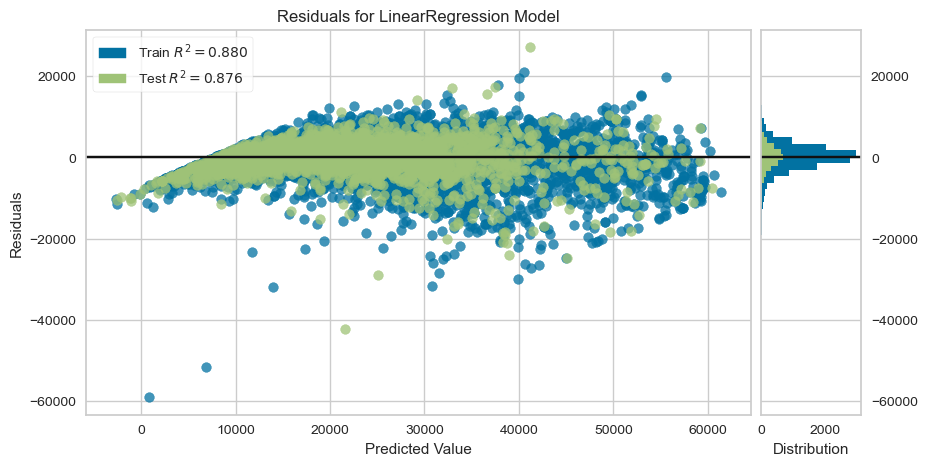

In [123]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# for cars priced at or around 7500 EURO, although our scores have improved
# still not suitable for linear regression.

In [124]:
pd.DataFrame(lm2.coef_, 
             index = X_train_scaled.columns, 
             columns=["Coef"])

# The coefficients of the features with onehot encoder applied are very high. Dummy variable trap

# https://geoffruddock.com/one-hot-encoding-plus-linear-regression-equals-multi-collinearity/

# Dummy variable trap is a problem that occurs when the independent variables used in regression analysis are related
# to each other. This can occur when new dummies are generated from a feature

# Especially in multiple linear regression models, it is thought that all independent variables should be
# included in the model.
# However, when there is an exact relationship between some independent variables
# (that is, if a variable can be derived from the sum of other variables),
# problems may arise with the accuracy of the model. This may also be reflected in the significantly
# higher correlations in the correlation matrix of the independent variables.

# Dummy variable trap may occur, especially when adding categorical variables to models.
# Categorical variables, such as "gender" or "country", are often converted to dummy variables
# when added to the model. This means, for example, creating two different dummy variables
# "male" and "female" for the "gender" variable. However, in this case, the addition of both variables
# to the model may cause problems as they are variables that can be derived from each other.
# This occurs when a dummy variable can be derived from the sum of other dummy variables.

# In order to reduce the effect of the dummy variable trap, when transforming the unique categorical observations
# under each featura into dummies features, it can be eliminated by dropping 1 of these observations or
# applying regularization.

# The drop="first" parameter in the code OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first"), cat_onehot)
# drops 1 unique categorical observation in each featur and is among the new dummies features.
# weakens the relationship. but drop="first" is not used when feature importance is to be made.
# Regularization is preferred.

Coef
make_model_Dacia Duster          1112161522965227.375
make_model_Dacia Logan           1112161522963410.625
make_model_Dacia Sandero         1112161522962021.000
make_model_Fiat 500              1112161522963839.000
make_model_Fiat 500C             1112161522965921.250
make_model_Fiat 500X             1112161522966351.250
make_model_Fiat Panda            1112161522963480.000
make_model_Fiat Tipo             1112161522962975.125
make_model_Ford Fiesta           1112161522963546.000
make_model_Ford Focus            1112161522965407.625
make_model_Ford Kuga             1112161522966744.250
make_model_Ford Mondeo           1112161522966132.250
make_model_Ford Mustang          1112161522960659.000
make_model_Hyundai IONIQ         1112161522966379.000
make_model_Hyundai TUCSON        1112161522969526.750
make_model_Hyundai i20           1112161522963438.750
make_model_Hyundai i30           1112161522964089.500
make_model_Mercedes-Benz A 180   1112161522971502.500
make_model_Nissan 350Z           1112161522961556.250
make_model_Nissan 370Z           1112161522957914.625
make_model_Nissan Juke           1112161522965526.750
make_model_Nissan Micra          1112161522962806.750
make_model_Nissan Pulsar         1112161522964152.875
make_model_Nissan Qashqai        1112161522968108.625
make_model_Nissan X-Trail        1112161522967931.125
make_model_Opel Adam             1112161522962534.250
make_model_Opel Astra            1112161522963374.625
make_model_Opel Cascada          1112161522965515.750
make_model_Opel Corsa            1112161522962361.250
make_model_Opel Grandland X      1112161522966872.125
make_model_Opel Insignia         1112161522964854.750
make_model_Peugeot 2008          1112161522967335.375
make_model_Peugeot 206           1112161522970227.000
make_model_Peugeot 207           1112161522965208.125
make_model_Peugeot 208           1112161522964637.000
make_model_Peugeot 3008          1112161522970321.750
make_model_Peugeot 308           1112161522966262.250
make_model_Peugeot 508           1112161522970288.250
make_model_Peugeot RCZ           1112161522966596.250
make_model_Renault Captur        1112161522966041.625
make_model_Renault Clio          1112161522964262.000
make_model_Renault Kadjar        1112161522966731.625
make_model_Renault Megane        1112161522966059.750
make_model_Renault Talisman      1112161522966199.125
make_model_SEAT Arona            1112161522965881.000
make_model_SEAT Ateca            1112161522969144.250
make_model_SEAT Ibiza            1112161522964034.625
make_model_SEAT Leon             1112161522964324.250
make_model_Skoda Fabia           1112161522963790.500
make_model_Skoda Karoq           1112161522971268.000
make_model_Skoda Kodiaq          1112161522975428.125
make_model_Skoda Octavia         1112161522966659.500
make_model_Skoda Scala           1112161522964764.750
make_model_Skoda Superb          1112161522969352.750
make_model_Toyota Auris          1112161522965776.375
make_model_Toyota Aygo           1112161522962317.500
make_model_Toyota C-HR           1112161522967220.250
make_model_Toyota Corolla        1112161522966043.375
make_model_Toyota RAV 4          1112161522970572.875
make_model_Toyota Yaris          1112161522965090.375
make_model_Volvo C30             1112161522967957.000
make_model_Volvo C70             1112161522970562.875
make_model_Volvo S60             1112161522971701.125
make_model_Volvo S90             1112161522975598.250
make_model_Volvo V40             1112161522965915.375
make_model_Volvo V60             1112161522968386.500
make_model_Volvo V90             1112161522975199.000
make_model_Volvo XC40            1112161522976378.125
make_model_Volvo XC60            1112161522976382.000
make_model_Volvo XC90            1112161522982157.125
body_type_Compact               15633834163512444.000
body_type_Convertible           15633834163512624.000
body_type_Coupe                 15633834163513188.000
body_type_Off-Road/Pick-up      15633834163510964.000

## Pipeline

In [125]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After dropping outlier observations, we divide the remaining data into X and y and divide it into train and test sets.

In [126]:
X_train.head()

make_model         body_type  type warranty   mileage    gearbox  \
7674       SEAT Leon     Station wagon  Used       No 35977.000  Automatic   
13227   Nissan Micra             Sedan  Used      Yes 74314.000     Manual   
8532   Skoda Octavia           Compact  Used      Yes 39563.000  Automatic   
4458     Peugeot 508  Off-Road/Pick-up  Used      Yes 80300.000  Automatic   
15437    Hyundai i30           Compact  Used      Yes 24576.000     Manual   

      fuel_type  seller  engine_size  gears  co_emissions drivetrain  extras  \
7674    Benzine  Dealer     1984.000  7.000       172.000      Front       5   
13227    Diesel  Dealer     1461.000  5.000       107.000      Front       7   
8532    Benzine  Dealer      999.000  7.000       128.000      Front       1   
4458     Diesel  Dealer     1997.000  6.000       100.000        4WD       2   
15437   Benzine  Dealer     1591.000  6.000       137.000      Front       1   

       empty_weight full_service_history         upholstery  previous_owner  \
7674       1476.000                  Yes  Part/Full Leather           1.000   
13227      1153.000                  Yes              Cloth           1.000   
8532       1247.000                   No              Cloth           1.000   
4458       1845.000                   No  Part/Full Leather           2.000   
15437      1196.000                   No              Cloth           1.000   

      energy_efficiency_class   age  power_kW  cons_avg  \
7674                efficient 3.000   213.000     6.500   
13227               efficient 4.000    66.000     4.100   
8532                efficient 3.000    85.000     4.700   
4458                efficient 5.000   147.000     4.000   
15437             unefficient 6.000   100.000     5.000   

      comfort_&_convenience_Package entertainment_&_media_Package  \
7674                       Standard                          Plus   
13227                       Premium                          Plus   
8532                       Standard                      Standard   
4458                       Standard                      Standard   
15437                      Standard                      Standard   

         safety_&_security_Package  
7674        Safety Premium Package  
13227       Safety Premium Package  
8532   Safety Premium Plus Package  
4458        Safety Premium Package  
15437      Safety Standard Package

In [127]:
cat_onehot  = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'drivetrain']

cat_ordinal = ['type', 'warranty', 'seller', 'full_service_history', 'upholstery', 'energy_efficiency_class', 'comfort_&_convenience_Package',
               'entertainment_&_media_Package', 'safety_&_security_Package']
    
cat_for_type=["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_warranty=["No", "Yes"]
cat_for_seller=['Dealer', 'Private seller']
cat_for_service_history=["No", "Yes"]
cat_for_upholstery=['Cloth','Part/Full Leather']
cat_for_energy=['unefficient', 'efficient']
cat_for_comfort=['Standard', 'Premium', 'Premium Plus']
cat_for_ent=['Standard', 'Plus']
cat_for_safety=['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [128]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_type,
                                         cat_for_warranty,
                                         cat_for_seller,
                                         cat_for_service_history,
                                         cat_for_upholstery,
                                         cat_for_energy,
                                         cat_for_comfort, 
                                         cat_for_ent, 
                                         cat_for_safety])
                                                    

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) # MinMaxScaler()

In [129]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

ridge_pipe.fit(X_train, y_train)

#What happens can be described as follows:

#The data are split into TRAINING data and TEST data according to ratio of train_test_split

#Fit process:

#ridge_pipe.fit(X_train, y_train) Here, what does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the train data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the train data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed. It is left as it is.
#  (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric train data obtained after the transformation, according to the min, max
#   information of the train data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#   0 and 1.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled train data (X_train) is given to the Ridge model together with y_train, and the training is
#   completed.

#ridge_pipe.fit(X_train, y_train) --> columns_trans.fit_transform(X_train)
#                                 --> MinMaxScaler().fit_transform(X_train_trans)
#                                 --> Ridge.fit(X_train_trans_scaled, y_train)

#Predict process:

#ridge_pipe.predict(X_test) What does it do sequentially?

#Since the first operation to be performed in the ridge_pipe model is column_trans;

#a. One-hot encoder transformation is performed on the features in the test data that will be converted to one-hot encoder
#   (cat_onehot) according to the information of the train data.

#b. Ordinal encoder transformation is performed on the features in the test data that will be converted to ordinal encoder
#   (cat_ordinal) according to the information of the train data.

#c. No operation is performed on the numeric features other than the features that have been transformed in the test data.
#   It is left as it is. (Because remainder='passthrough')

#Since the second operation to be performed in the ridge_pipe model is MinMaxScaler();

#   Minmax scaling is applied to the new numeric test data obtained after the transformation, according to the min, max 
#   information of the train data.

#Since the third operation to be performed in the ridge_pipe model is Ridge();

#   The transformed and scaled test data is predicted by the Ridge model according to the information of the train data.

#ridge_pipe.predict(X_test)  --> columns_trans.transform(X_test)
#                            --> MinMaxScaler().transform(X_test_trans)
#                            --> Ridge.predict(X_test_trans_scaled)

#Pipeline automates our processes as described here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

## Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

In [130]:
from sklearn.linear_model import Ridge

In [131]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [132]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2580.596     2494.098
mse  14151069.131 13451574.795
rmse     3761.791     3667.639
mape        0.131        0.130

## Cross Validation

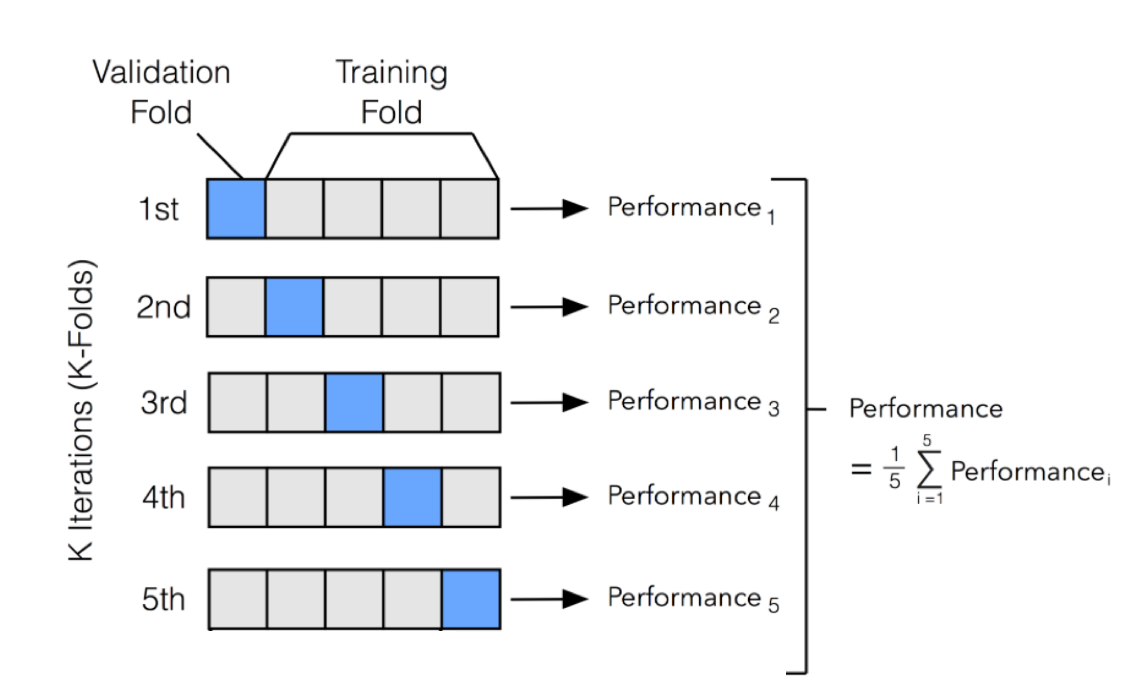

In [133]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

# Very important note: If you are doing a conversion to your data, make sure to use the pipeline in the CV process,
# otherwise the data leakage problem may occur.

# Since the use of a data that has been transformed into a CV will also cause data leakage,
# the original version of the data will be given to the CV, and the new train and new test sets in
# each iteration will be converted into numeric form in accordance with the pipeline steps and
# their scores will be taken in the CV.

# Remember that you have to do the CV process we did in the linear regression model with the pipeline.

In [134]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.087       0.018    0.883     0.879                     -2658.956   
2      0.118       0.013    0.875     0.880                     -2644.623   
3      0.112       0.013    0.888     0.879                     -2526.843   
4      0.107       0.017    0.868     0.881                     -2736.983   
5      0.143       0.015    0.877     0.880                     -2567.517   
6      0.091       0.019    0.869     0.881                     -2613.070   
7      0.132       0.015    0.889     0.879                     -2462.753   
8      0.109       0.018    0.878     0.880                     -2586.408   
9      0.079       0.017    0.883     0.879                     -2631.115   
10     0.107       0.019    0.860     0.882                     -2603.951   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -2568.946                -14695117.185   
2                       -2578.418                -14200648.755   
3                       -2590.220                -13129046.287   
4                       -2563.246                -17295599.965   
5                       -2584.420                -13048896.184   
6                       -2580.931                -14492974.304   
7                       -2597.636                -12488050.674   
8                       -2583.628                -13763560.525   
9                       -2571.969                -14728233.287   
10                      -2577.541                -16545801.980   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                  -14110508.047                         -3833.421   
2                  -14172160.132                         -3768.375   
3                  -14277301.651                         -3623.403   
4                  -13839085.639                         -4158.798   
5                  -14285705.482                         -3612.326   
6                  -14126753.287                         -3806.964   
7                  -14346209.792                         -3533.844   
8                  -14209083.637                         -3709.927   
9                  -14104908.307                         -3837.738   
10                 -13899004.273                         -4067.653   

    train_neg_root_mean_squared_error  \
1                           -3756.396   
2                           -3764.593   
3                           -3778.532   
4                           -3720.092   
5                           -3779.644   
6                           -3758.557   
7                           -3787.639   
8                           -3769.494   
9                           -3755.650   
10                          -3728.137   

    test_neg_mean_absolute_percentage_error  \
1                                    -0.130   
2                                    -0.136   
3                                    -0.130   
4                                    -0.134   
5                                    -0.132   
6                                    -0.137   
7                                    -0.126   
8                                    -0.131   
9                                    -0.131   
10                                   -0.134   

    train_neg_mean_absolute_percentage_error  
1                                     -0.131  
2                                     -0.131  
3                                     -0.132  
4                                     -0.131  
5                                     -0.131  
6                                     -0.131  
7                                     -0.132  
8                                     -0.131  
9                                     -0.131  
10                                    -0.131

In [135]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2603.222
train_neg_mean_absolute_error                  -2579.696
test_neg_mean_squared_error                -14438792.915
train_neg_mean_squared_error               -14137072.025
test_neg_root_mean_squared_error               -3795.245
train_neg_root_mean_squared_error              -3759.873
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Ridge

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
alpha_space = np.linspace(0.001, 100, 100)

In [138]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# Very important note: If you are doing a transformation to your data, make sure to use pipeline in gridsearch operation,
# otherwise data leakage problem may occur.

# Since the use of a transformed data in gridsearch will also cause data leakage, the original state of
# the data will be given to gridsearch, and the new train and new test sets in each iteration
# will be converted into numeric form in accordance with the pipeline steps and their scores will be taken in gridsearch.

# Remember that you have to do the gridsearch operation that we did in the linear regression model with the pipeline.

In [139]:
pipe_model.get_params()  # to see the parameters of the model defined with pipeline

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['make_model', 'body_type', 'gearbox',
                                     'fuel_type', 'drivetrain']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Used',
                                                                "Employee's car",
                                                                'Demonstration',
                                                                'Pre-registered'],
                                                               ['No', 'Yes'],
                                                               ['Dealer',
                                  

In [140]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [141]:
ridge_grid_model.best_estimator_

# hyper returns only values other than default from parameters. If our best alpha after gridsearch was 1,
# it wouldn't show 1 here.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

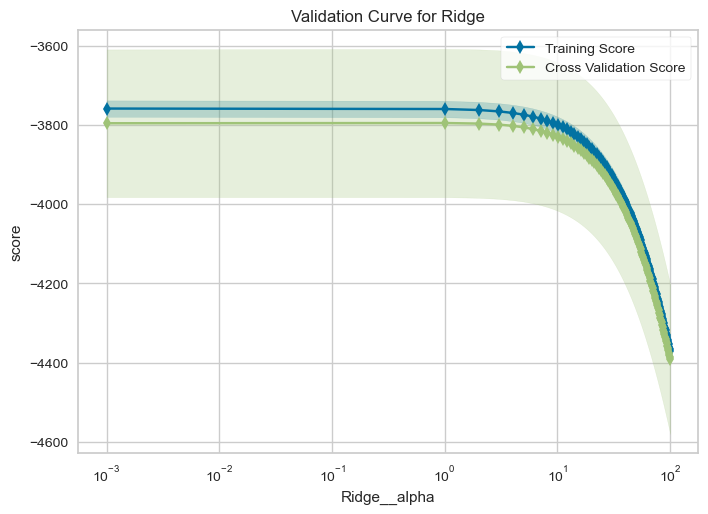

In [142]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Ridge__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [143]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.252
mean_train_score   -3759.895
Name: 1, dtype: object

In [144]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2580.585     2494.075
mse  14151207.110 13451629.912
rmse     3761.809     3667.646
mape        0.131        0.130

In [145]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [146]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([ -1605.33987449,  -3179.763538  ,  -4690.76770258,  -2762.96734981,
         -609.18182036,   -615.72144197,  -3225.278956  ,  -3672.17220693,
        -3122.28831112,  -1390.82522765,   -254.76231792,   -640.03120281,
        -4671.66587996,   -541.79116613,   2383.74676001,  -3197.44377938,
        -2689.60709432,   4591.71435829,  -4136.71155589,  -7620.65258738,
        -1229.41401079,  -3758.53131206,  -2648.98603862,   1240.2991257 ,
          912.07677058,  -4080.97502772,  -3345.62928451,  -1256.82221008,
        -4279.97059019,   -172.95255635,  -2055.18646573,    397.02493184,
         2303.91029183,  -1470.66053681,  -2118.55452561,   3284.21532102,
         -459.59456619,   3391.13067218,   -218.02827754,   -919.15102248,
        -2422.20460288,   -198.09792147,   -673.82564567,   -574.94178568,
        -1018.79805281,   2172.97944443,  -2707.70432418,  -2420.16478762,
        -2931.06195008,   4254.60287522,   8235.5206978 ,    -79.54623714,
        -2025.9089232 ,  

In [147]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Dacia Duster', 'make_model_Dacia Logan',
       'make_model_Dacia Sandero', 'make_model_Fiat 500',
       'make_model_Fiat 500C', 'make_model_Fiat 500X',
       'make_model_Fiat Panda', 'make_model_Fiat Tipo',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Kuga', 'make_model_Ford Mondeo',
       'make_model_Ford Mustang', 'make_model_Hyundai IONIQ',
       'make_model_Hyundai TUCSON', 'make_model_Hyundai i20',
       'make_model_Hyundai i30', 'make_model_Mercedes-Benz A 180',
       'make_model_Nissan 350Z', 'make_model_Nissan 370Z',
       'make_model_Nissan Juke', 'make_model_Nissan Micra',
       'make_model_Nissan Pulsar', 'make_model_Nissan Qashqai',
       'make_model_Nissan X-Trail', 'make_model_Opel Adam',
       'make_model_Opel Astra', 'make_model_Opel Cascada',
       'make_model_Opel Corsa', 'make_model_Opel Grandland X',
       'make_model_Opel Insignia', 'make_model_Peugeot 2008',
       'make_model_Peugeot 206', 'make

In [148]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_, 
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

Coef
mileage                        -22037.201
age                            -19896.310
make_model_Nissan 370Z          -7620.653
make_model_Dacia Sandero        -4690.768
make_model_Ford Mustang         -4671.666
make_model_Opel Corsa           -4279.971
make_model_Toyota Aygo          -4195.214
make_model_Nissan 350Z          -4136.712
make_model_Opel Adam            -4080.975
make_model_Nissan Micra         -3758.531
make_model_Fiat Tipo            -3672.172
make_model_Opel Astra           -3345.629
make_model_Fiat Panda           -3225.279
make_model_Hyundai i20          -3197.444
make_model_Dacia Logan          -3179.764
make_model_Ford Fiesta          -3122.288
make_model_Skoda Fabia          -2931.062
make_model_Fiat 500             -2762.967
drivetrain_Front                -2757.280
make_model_SEAT Ibiza           -2707.704
make_model_Hyundai i30          -2689.607
co_emissions                    -2678.082
make_model_Nissan Pulsar        -2648.986
make_model_Renault Clio         -2422.205
make_model_SEAT Leon            -2420.165
make_model_Peugeot 208          -2118.555
make_model_Opel Insignia        -2055.186
make_model_Skoda Scala          -2025.909
make_model_Toyota Yaris         -1629.924
make_model_Dacia Duster         -1605.340
fuel_type_Liquid/Natural Gas    -1536.044
make_model_Peugeot 207          -1470.661
make_model_Ford Focus           -1390.825
make_model_Opel Cascada         -1256.822
make_model_Nissan Juke          -1229.414
body_type_Off-Road/Pick-up      -1214.931
cons_avg                        -1179.578
gearbox_Manual                  -1160.586
make_model_SEAT Arona           -1018.798
make_model_Toyota Auris          -927.604
make_model_Renault Captur        -919.151
make_model_Volvo V40             -901.469
drivetrain_4WD                   -892.922
fuel_type_Benzine                -873.527
make_model_Renault Megane        -673.826
make_model_Ford Mondeo           -640.031
make_model_Fiat 500X             -615.721
make_model_Fiat 500C             -609.182
make_model_Toyota Corolla        -601.161
fuel_type_Diesel                 -585.118
make_model_Renault Talisman      -574.942
make_model_Hyundai IONIQ         -541.791
make_model_Peugeot 308           -459.595
previous_owner                   -442.785
seller                           -413.678
make_model_Ford Kuga             -254.762
make_model_Peugeot RCZ           -218.028
make_model_Renault Kadjar        -198.098
make_model_Opel Grandland X      -172.953
warranty                         -141.692
body_type_Sedan                  -138.874
make_model_Skoda Octavia          -79.546
gears                              76.244
body_type_Compact                  81.095
energy_efficiency_class            90.804
body_type_Convertible             106.019
safety_&_security_Package         184.183
full_service_history              216.764
body_type_Station wagon           266.447
make_model_Toyota C-HR            293.830
comfort_&_convenience_Package     362.955
make_model_Peugeot 2008           397.025
gearbox_Semi-automatic            436.930
upholstery                        617.040
gearbox_Automatic                 723.656
extras                            736.440
entertainment_&_media_Package     800.356
body_type_Coupe                   900.243
make_model_Nissan X-Trail         912.077
make_model_Volvo C30             1136.487
make_model_Nissan Qashqai        1240.299
make_model_Volvo V60             1474.906
make_model_SEAT Ateca            2172.979
make_model_Peugeot 206           2303.910
make_model_Hyundai TUCSON        2383.747
make_model_Skoda Superb          2544.325
type                             2875.925
fuel_type_Electric               2994.688
make_model_Peugeot 3008          3284.215
make_model_Peugeot 508           3391.131
make_model_Toyota RAV 4          3452.501
drivetrain_Rear                  3650.202
make_model_Volvo C70             3770.294
make_model_Skoda Karoq           4254.603
make_model_Mercedes-Benz A 180   4591.714
make_

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [149]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [150]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [151]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

train         test
R2          0.879        0.876
mae      2583.070     2496.918
mse  14182021.132 13512780.059
rmse     3765.902     3675.973
mape        0.131        0.130

## Cross Validation

In [152]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [153]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.877
train_r2                                           0.880
test_neg_mean_absolute_error                   -2605.170
train_neg_mean_absolute_error                  -2582.291
test_neg_mean_squared_error                -14455442.008
train_neg_mean_squared_error               -14165184.573
test_neg_root_mean_squared_error               -3797.376
train_neg_root_mean_squared_error              -3763.609
test_neg_mean_absolute_percentage_error           -0.132
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Lasso

In [154]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [155]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [156]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

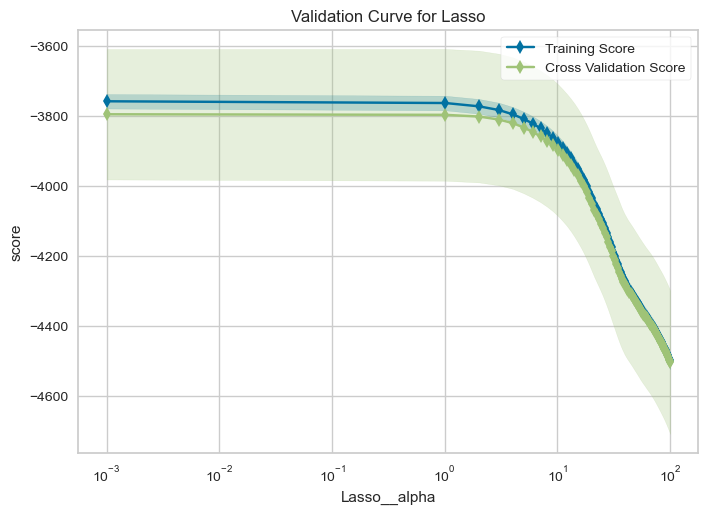

In [157]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Lasso__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [158]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.808
mean_train_score   -3758.756
Name: 0, dtype: object

In [159]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2582.289     2497.357
mse  14144169.797 13451525.346
rmse     3760.874     3667.632
mape        0.131        0.131

In [160]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [161]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
             columns=["Coef"]).sort_values("Coef")

Coef
mileage                        -22256.436
age                            -19979.161
make_model_Nissan 370Z          -9047.969
make_model_Ford Mustang         -6036.908
make_model_Nissan 350Z          -5415.666
make_model_Dacia Sandero        -4835.801
make_model_Toyota Aygo          -4465.652
make_model_Opel Corsa           -4422.891
make_model_Opel Adam            -4262.315
make_model_Nissan Micra         -3920.993
make_model_Fiat Tipo            -3726.361
make_model_Fiat Panda           -3399.094
make_model_Opel Astra           -3377.727
make_model_Hyundai i20          -3369.263
make_model_Dacia Logan          -3334.517
make_model_Ford Fiesta          -3253.477
make_model_Skoda Fabia          -3054.259
make_model_Fiat 500             -2954.845
make_model_SEAT Ibiza           -2831.928
make_model_Hyundai i30          -2750.270
make_model_Nissan Pulsar        -2707.574
co_emissions                    -2700.069
drivetrain_Front                -2628.882
make_model_Renault Clio         -2549.870
make_model_SEAT Leon            -2478.396
make_model_Peugeot 208          -2250.352
make_model_Skoda Scala          -2103.103
make_model_Opel Insignia        -1923.395
make_model_Toyota Yaris         -1773.950
make_model_Peugeot 207          -1610.559
make_model_Dacia Duster         -1541.723
make_model_Ford Focus           -1442.951
cons_avg                        -1266.760
make_model_Nissan Juke          -1261.245
make_model_Opel Cascada         -1236.436
body_type_Off-Road/Pick-up      -1221.486
make_model_Toyota Auris          -984.643
make_model_SEAT Arona            -981.468
fuel_type_Liquid/Natural Gas     -932.475
make_model_Fiat 500C             -897.493
make_model_Renault Captur        -867.635
make_model_Volvo V40             -857.908
drivetrain_4WD                   -831.394
make_model_Toyota Corolla        -734.372
make_model_Renault Megane        -729.370
make_model_Ford Mondeo           -555.805
make_model_Renault Talisman      -537.339
make_model_Fiat 500X             -534.075
make_model_Hyundai IONIQ         -505.754
make_model_Peugeot 308           -498.352
seller                           -413.838
previous_owner                   -395.249
fuel_type_Benzine                -292.473
make_model_Peugeot RCZ           -273.270
warranty                         -147.780
make_model_Renault Kadjar         -85.112
make_model_Skoda Octavia          -85.092
body_type_Sedan                   -32.438
gears                             -17.316
gearbox_Manual                    -15.374
make_model_Ford Kuga                9.852
fuel_type_Diesel                   25.552
make_model_Opel Grandland X        43.241
energy_efficiency_class            71.383
safety_&_security_Package         174.583
body_type_Compact                 184.815
full_service_history              223.902
comfort_&_convenience_Package     344.704
body_type_Convertible             345.849
make_model_Toyota C-HR            363.147
body_type_Station wagon           388.464
make_model_Peugeot 2008           433.277
upholstery                        589.302
extras                            744.502
entertainment_&_media_Package     792.671
body_type_Coupe                  1035.462
make_model_Nissan X-Trail        1138.697
make_model_Volvo C30             1138.950
make_model_Nissan Qashqai        1283.535
gearbox_Semi-automatic           1605.502
make_model_Volvo V60             1715.602
gearbox_Automatic                1847.293
make_model_SEAT Ateca            2342.112
make_model_Hyundai TUCSON        2547.544
make_model_Skoda Superb          2631.799
type                             2861.965
make_model_Peugeot 206           3405.589
make_model_Peugeot 3008          3455.286
make_model_Peugeot 508           3463.049
fuel_type_Electric               3596.543
make_model_Toyota RAV 4          3713.750
make_model_Volvo C70             3848.767
empty_weight                     4303.786
make_model_Skoda Karoq           4410.294
make_model_Mercedes-Benz A 180   4666.081
make_

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [162]:
from sklearn.linear_model import ElasticNet

In [163]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [164]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

train         test
R2          0.450        0.448
mae      5806.530     5705.576
mse  64646339.678 59992288.338
rmse     8040.295     7745.469
mape        0.311        0.314

## Cross Validation

In [165]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'], 
                        cv=10, 
                        return_train_score=True)

In [166]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.450
train_r2                                           0.451
test_neg_mean_absolute_error                   -5806.493
train_neg_mean_absolute_error                  -5802.239
test_neg_mean_squared_error                -64665655.285
train_neg_mean_squared_error               -64564838.879
test_neg_root_mean_squared_error               -8035.804
train_neg_root_mean_squared_error              -8035.191
test_neg_mean_absolute_percentage_error           -0.311
train_neg_mean_absolute_percentage_error          -0.311
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [167]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[0.5, 0.7, 0.9, 0.95, 0.99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [219]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'drivetrain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'Demonstratio...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [220]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'drivetrain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['No',
                                                                              'Y...
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['type', 'warranty', 'seller',
                                                   'full_service_history',
                                                   'upholstery',
                                                   'energy_efficiency_class',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.001, l1_ratio=0.95))])

In [221]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3795.200
mean_train_score   -3759.223
Name: 3, dtype: object

In [222]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

train         test
R2          0.880        0.876
mae      2580.946     2494.839
mse  14147645.216 13450870.320
rmse     3761.336     3667.543
mape        0.131        0.131

In [168]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Feature İmportance/selection

In [ ]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")

In [ ]:
df_feat_imp

In [ ]:
plt.figure(figsize=(10,14))
ax= sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index)

In [ ]:
lasso_grid_model.best_estimator_["Lasso"]

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"] # Lasso(alpha=0.001)

viz = FeatureImportances(model, 
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [ ]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

# we select the top 6 features that have the most impact on prediction. Here, a question may come up as
# "Why the make_model feature was chosen?". When the above image is examined, we also chose the make_model feature
# since we saw that the make_model feature has unique categorical observations (Audi A3, AudiA1, Renault Espace etc.)
# among the featurs that have the most impact on the prediction.

# Although the "type" feature does not contribute much to the prediction,
# it has been kept in the data in order to have a feature in our data that we will make the ordinal transformation.

In [ ]:
df_new

In [232]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# According to our data set with 5 new features, we determine our X and y and reconstruct the model.
# And we repeat the operations we did above.

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
X_train.head()

make_model  power_kW   mileage   age  engine_size  type
7674       SEAT Leon   213.000 35977.000 3.000     1984.000  Used
13227   Nissan Micra    66.000 74314.000 4.000     1461.000  Used
8532   Skoda Octavia    85.000 39563.000 3.000      999.000  Used
4458     Peugeot 508   147.000 80300.000 5.000     1997.000  Used
15437    Hyundai i30   100.000 24576.000 6.000     1591.000  Used

In [235]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough', #MinMaxScaler()
                                        verbose_feature_names_out=False) 

In [236]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

train         test
R2          0.866        0.860
mae      2765.906     2680.129
mse  15773600.948 15221457.560
rmse     3971.599     3901.469
mape        0.140        0.140

## Cross Validate

In [238]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10, 
                        return_train_score=True)

In [239]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.864
train_r2                                           0.866
test_neg_mean_absolute_error                   -2783.905
train_neg_mean_absolute_error                  -2765.010
test_neg_mean_squared_error                -15980582.065
train_neg_mean_squared_error               -15762787.916
test_neg_root_mean_squared_error               -3992.602
train_neg_root_mean_squared_error              -3970.176
test_neg_mean_absolute_percentage_error           -0.141
train_neg_mean_absolute_percentage_error          -0.140
dtype: float64

In [240]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [242]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

# We assign the metrics we get from all models to the scores variable in dict format.

Model  r2_score      mae     rmse  mape
0   linear_m     0.876 2498.880 3673.752 0.131
1    ridge_m     0.876 2494.075 3667.646 0.130
2    lasso_m     0.876 2497.240 3667.657 0.131
3  elastic_m     0.876 2494.839 3667.543 0.131
4    final_m     0.860 2680.129 3901.469 0.140

In [243]:
compare.sort_values(by="r2_score", ascending=False) #  ascending=False sorts in descending (high-->low) order.

Model  r2_score      mae     rmse  mape
3  elastic_m     0.876 2494.839 3667.543 0.131
1    ridge_m     0.876 2494.075 3667.646 0.130
2    lasso_m     0.876 2497.240 3667.657 0.131
0   linear_m     0.876 2498.880 3673.752 0.131
4    final_m     0.860 2680.129 3901.469 0.140

In [244]:
compare.sort_values(by="mae", ascending=True) #  ascending=True sorts in ascending (low-->high) order.

Model  r2_score      mae     rmse  mape
1    ridge_m     0.876 2494.075 3667.646 0.130
3  elastic_m     0.876 2494.839 3667.543 0.131
2    lasso_m     0.876 2497.240 3667.657 0.131
0   linear_m     0.876 2498.880 3673.752 0.131
4    final_m     0.860 2680.129 3901.469 0.140

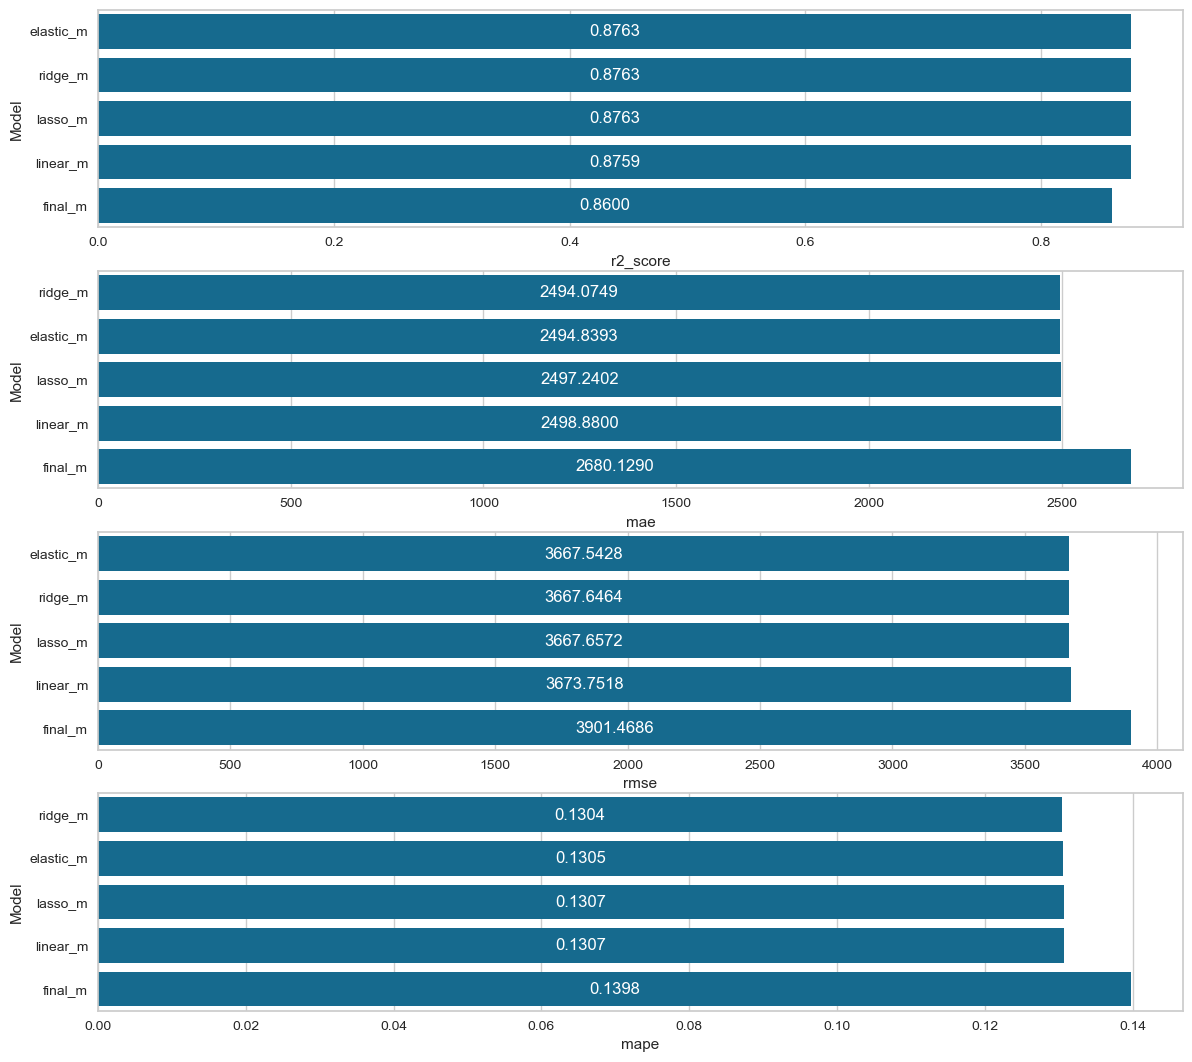

In [245]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")
plt.show();

## Final Model and Prediction new observation

In [247]:
X = df_new.drop(columns = ["price"])
y = df_new.price

# After trying all models and deciding on the model with the most optimal score,
# we separate the data we use for this model as X and y.
# Note that we do not distinguish between train and test sets in the final stage.

In [248]:
X.head()

make_model  power_kW    mileage   age  engine_size            type
0  Mercedes-Benz A 180    85.000  27150.000 2.000     1461.000            Used
2  Mercedes-Benz A 180    85.000  21734.000 2.000     1461.000            Used
3  Mercedes-Benz A 180    80.000 172700.000 4.000     1461.000            Used
4  Mercedes-Benz A 180    85.000  18989.000 2.000     1461.000            Used
5  Mercedes-Benz A 180   100.000     25.000 1.000     1332.000  Pre-registered

In [249]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

# After comparing the scores in the table above, we decide on the Lasso model,
# which consists of 6 features, as our final model.
# In the lasso model with 6 features, we re-build the model with the hyperparameter, where we get the best score.

In [250]:
final_model.fit(X, y)

# What does final_model.fit(X,y) do in order?
# 1. Since the first operation to be done in final_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in X data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in X data that will be transformed (cat_ordinal) 
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed. They are
#       left as they are.
# 2. Since the second operation to be done in final_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric X we obtained after the transformation according to the min and max
#       information of X data. Minmaxscale was applied so that the observations consisting of 0 and 1 in our data remain
#       as 0 and 1.
# 3. Since the third operation to be done in final_model is Lasso();
#    a. The transformed and scaled X is given to the Lasso model along with y and the training is completed.

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [251]:
X

make_model  power_kW    mileage   age  engine_size  \
0      Mercedes-Benz A 180    85.000  27150.000 2.000     1461.000   
2      Mercedes-Benz A 180    85.000  21734.000 2.000     1461.000   
3      Mercedes-Benz A 180    80.000 172700.000 4.000     1461.000   
4      Mercedes-Benz A 180    85.000  18989.000 2.000     1461.000   
5      Mercedes-Benz A 180   100.000     25.000 1.000     1332.000   
...                    ...       ...        ...   ...          ...   
18190            Volvo S90   140.000  93757.000 4.000     1969.000   
18191            Volvo S90   140.000  93757.000 4.000     1969.000   
18192            Volvo V40    88.000 114000.000 4.000     1969.000   
18194            Volvo S90   288.000  40345.000 3.000     1969.000   
18196            Volvo S90   187.000  94343.000 5.000     1969.000   

                 type  
0                Used  
2                Used  
3                Used  
4                Used  
5      Pre-registered  
...               ...  
18190            Used  
18191            Used  
18192            Used  
18194            Used  
18196            Used  

[16370 rows x 6 columns]

In [252]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [253]:
X.head()

# The feature order of the observation we will predict should be the same as the feature order of the data we train.

make_model  power_kW    mileage   age  engine_size            type
0  Mercedes-Benz A 180    85.000  27150.000 2.000     1461.000            Used
2  Mercedes-Benz A 180    85.000  21734.000 2.000     1461.000            Used
3  Mercedes-Benz A 180    80.000 172700.000 4.000     1461.000            Used
4  Mercedes-Benz A 180    85.000  18989.000 2.000     1461.000            Used
5  Mercedes-Benz A 180   100.000     25.000 1.000     1332.000  Pre-registered

In [254]:
new_obs = pd.DataFrame([my_dict])
new_obs

# we found that the feature rankings are the same

make_model  power_kW  mileage  age  engine_size  type
0  Mercedes-Benz A 180        85    30000    3         1461  Used

In [255]:
final_model.predict(new_obs)

array([27100.749921])

In [256]:
# when feature order is different

my_dict = {
    "type": "Used",
    "power_kW": 85,
    "make_model": 'Mercedes-Benz A 180',
    "engine_size": 1461,
    "mileage": 30000,
    "age": 3,
    "color":"white"
}

new_obs = pd.DataFrame([my_dict])
new_obs

type  power_kW           make_model  engine_size  mileage  age  color
0  Used        85  Mercedes-Benz A 180         1461    30000    3  white

In [257]:
final_model.predict(new_obs)

# new_obs and X's feature order is different. make_column_transformer detects this difference and adjusts
# the feature order of new_obs to the feature order of the X data it is training.

array([27100.749921])

In [258]:
# What does pipe_model.predict(new_obs) do in order?

# 1. Since the first operation to be done in pipe_model is column_trans;
#    a. Onehotencoder transformation is applied to the features in new_obs data that will be transformed (cat_onehot) 
#       according to the information of X data.
#    b. Ordinalencoder transformation is applied to the features in new_obs data that will be transformed (cat_ordinal)
#       according to the information of X data.
#    c. No operation is performed on the numeric features other than the features that have been transformed in new_obs data.
#       They are left as they are.
# 2. Since the second operation to be done in pipe_model is MinMaxScaler();
#    a. Minmax scale is applied to the new numeric new_obs we obtained after the transformation according to the min and max
#       information of X data.
# 3. Since the third operation to be done in pipe_model is Lasso();
#    a. The transformed and scaled new_obs data is predicted by the Lasso model according to the information of X.

In [259]:
# Important note: The make_column_transformer function puts categorical features at the beginning of the newly created df
# in the order of transformation, and numeric features at the end.

___

<p style="text-align: center;"><img src="https://clarusway.com/wp-content/uploads/2022/07/clarusway-logo-classic.jpg" class="img-fluid" alt="CLRSWY" width="400" height="300"
></p>

___